## Problem Statement

### Business Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Installing and Importing the necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 27.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

In [ ]:
# Libraries for reading and manipulating data
import pandas as pd
import numpy as np

# Libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# To filter warnings on updated python versions
import warnings
warnings.filterwarnings('ignore')

# Library to split data, impute missing values
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# To tune different models
from sklearn.model_selection import GridSearchCV

# To measure classification performance
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Libraries to build Decision Tree and different ensemble classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

# To build model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# To install xgboost library
from xgboost import XGBClassifier


## Import Dataset

In [114]:
 #Giving Colab access to Drive
from google.colab import drive
drive.mount('/content/drive')

# Uploading the dataset
df = pd.read_csv('/content/drive/MyDrive/Easyvisaproject/EasyVisa.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [ ]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


**Observation**
1.   Dataset loads properly
2.   Dataset is as per the description in the data dictionary




#### Understand the shape of the dataset

In [ ]:
df.shape

(25480, 12)

**Observation**
1. There are 25480 rows
2. There are 12 columns





#### Check the data types of the columns for the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


**Observation**
1. No missing rows as total dataset has 25480 rows
2. Three columns have numerical values - no_of_employees, yr_of_estab, prevailing_wage
3. All other variables are of object type
4. yr_of_estab is numerical although its an year
5. Dependant variable case_status is of type object
6. Implementation at this stage should be copying the data data set to a different variable and converting object type to category to reduce memory useage

In [ ]:
df_copy = df.copy()

In [ ]:
cols = df_copy.select_dtypes(include=['object']).columns
df_copy[cols] = df_copy[cols].apply(lambda x: x.astype('category'))

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


Check duplicate values and missing values

In [ ]:
df_copy.duplicated().sum()

np.int64(0)

In [ ]:
df_copy.isna().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


**Observation:**
1. There are no missing values
2. There are no duplciate values

Looking at the statistical data

In [ ]:
df_copy.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV9999,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observation**

1.   Case id has all unique values. We will drop this column as it provides no significant value to the analysis or model.
2. There are 6 continents in the dataset. Asia is the most common one with 16861 requests being from there.
3. There are 4 unique values on education of the employee. 10234 cases have a bachelor's degree.
4. A little over half of the cases have job experience (14802).
5. Most of the people don'trequire job training (22525 out of 25480).
6. Number of employees has negative values. We will look into this further.
7. Employer's companies were established between 1800 and 2016.
8. There are 5 unique value on region of employment. The most requested region is Northeast with 7195.
9. The average prevailing wage is 74455.81. There is a big variance in this column, between 2.1367 and 319210.27. It could be influenced by the unit of wage.
10. Most units of wage are Year, with 22962 out of 25480. There are 4 unique values.
11. 22773 workers have a full time job.
12. 17018 visas out of 25480 were certified.




In [ ]:
df_copy = df_copy.drop(['case_id'], axis=1)

In [ ]:
df_copy.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


## Exploratory Data Analysis (EDA)

#### Fixing the negative values in number of employees columns

In [ ]:
df_copy.loc[df_copy['no_of_employees']<=0]


,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,Europe,Master's,N,N,-25,1980,Northeast,39452.9900,Year,Y,Certified
378,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.1400,Year,Y,Denied
832,South America,Master's,Y,N,-17,2002,South,129701.9400,Year,Y,Certified
2918,Asia,Master's,Y,N,-26,2005,Midwest,112799.4600,Year,Y,Certified
6439,Asia,Bachelor's,N,N,-14,2013,South,103.9700,Hour,Y,Denied
6634,Asia,Bachelor's,Y,N,-26,1923,West,5247.3200,Year,Y,Denied
7224,Europe,Doctorate,N,N,-25,1998,Midwest,141435.9500,Year,Y,Certified
7281,Asia,High School,N,N,-14,2000,Midwest,58488.5000,Year,Y,Denied
7318,Asia,Bachelor's,Y,Y,-26,2006,South,115005.6100,Year,Y,Certified
7761,Asia,Master's,N,N,-11,2009,Midwest,38457.5100,Year,Y,Certified


**Observation**

1. The number of employees are negative. Hence this needs to be corrected

In [ ]:
df_copy['no_of_employees'] = df_copy['no_of_employees'].abs()

In [ ]:
df_copy.loc[df_copy['no_of_employees']<=0]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status


##Observation now##
1. All rows for number of employees have been turned into positive.   

# #### Let's check the count of each unique category in each of the categorical variables

In [ ]:
categorical_columns =  list(df_copy.select_dtypes("object").columns)
for col in categorical_columns:
  unique_values = df_copy[col].value_counts()
  print(f"Unique values in {col}: {unique_values}")

### Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on education of employee

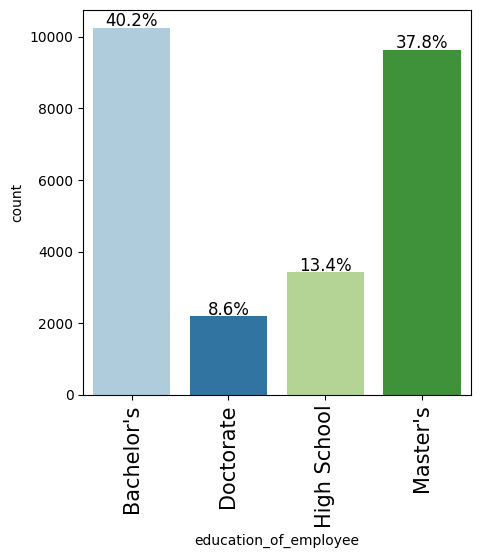

In [ ]:
labeled_barplot(df_copy,'education_of_employee', perc=True)

**Observation**
1. Highest number of employees have bachelors degree
2. Lowest have doctorate degree
3. There are 9000 Plus employee having masters degree
4. 3420 employees have high school

#### Observations on region of employment

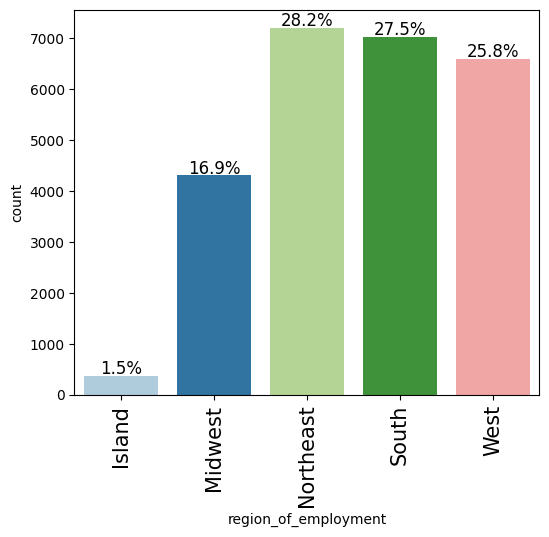

In [ ]:
labeled_barplot(df_copy,'region_of_employment',perc=True)

**Obsesrvation**
1. Region of employement is maximum is in northeast
2. Lowest region of employment is in  i.e =1.5%

#### Observations on job experience

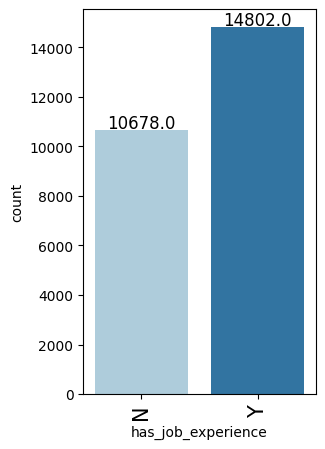

In [ ]:
labeled_barplot(df_copy,'has_job_experience')

**Observation**
1. 14802 employees have job experience

#### Observations on case status

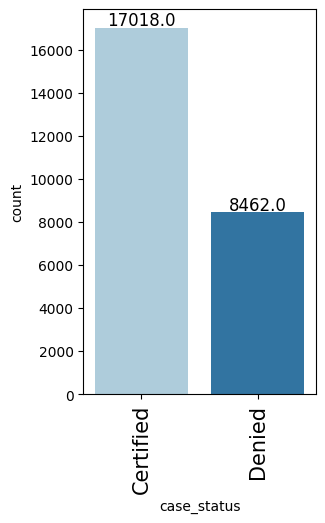

In [ ]:
labeled_barplot(df_copy,'case_status')

**Observartion**
1. 17018 employees are certified

### Bivariate Analysis

**Creating functions that will help us with further analysis.**

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Does higher education increase the chances of visa certification for well-paid jobs abroad?

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


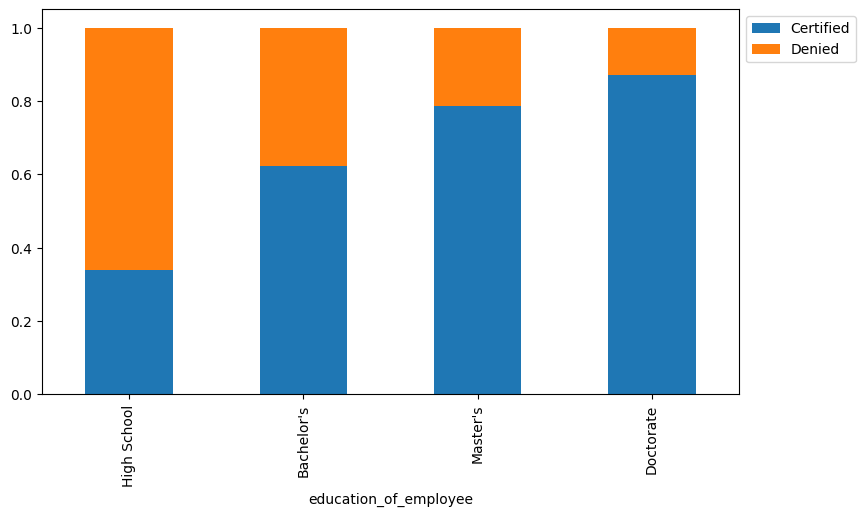

In [219]:
stacked_barplot(df_copy, 'education_of_employee', 'case_status')


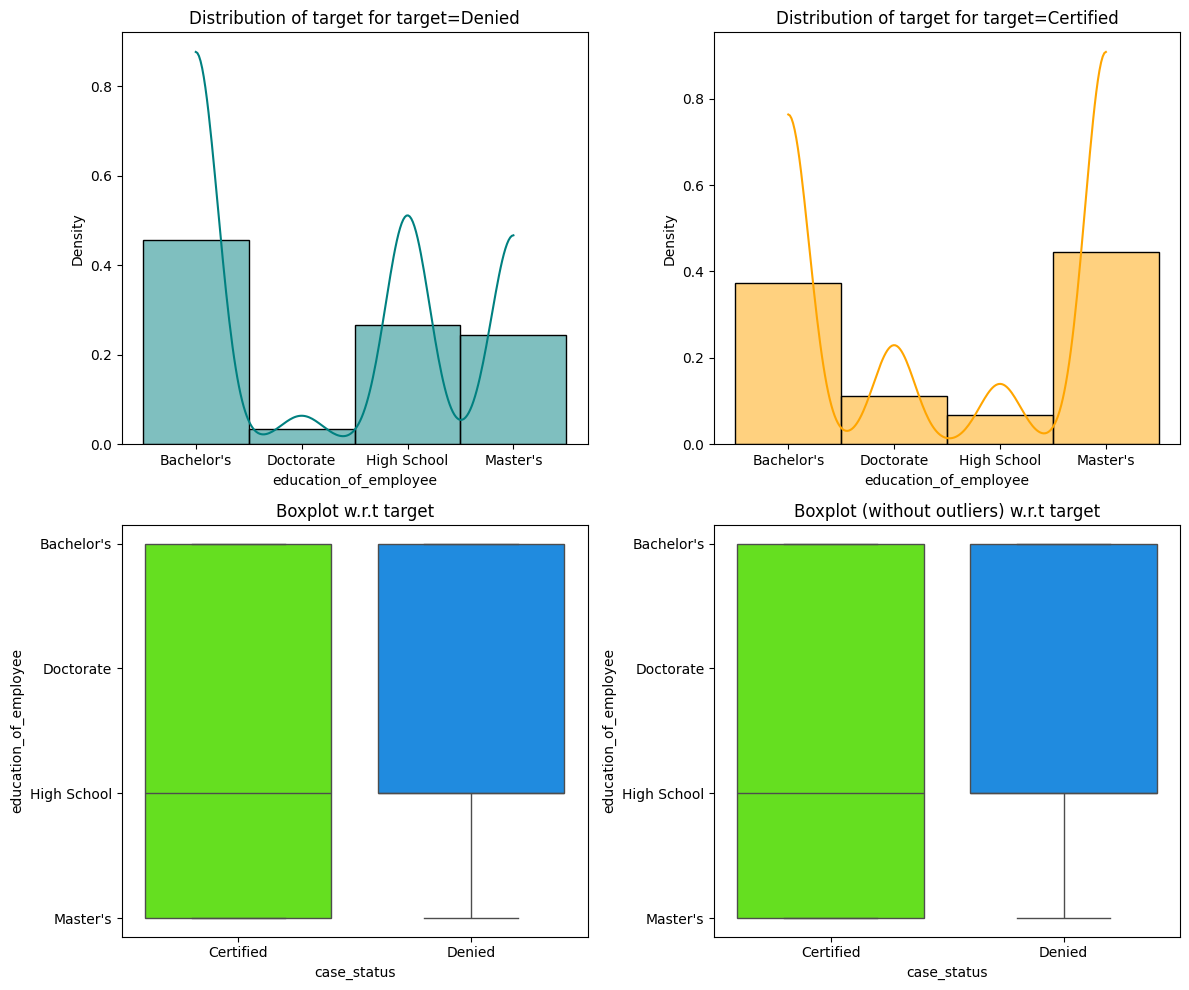

In [ ]:
distribution_plot_wrt_target(df_copy, 'education_of_employee', 'case_status')

**Observation**
1. Yes higher education do increase the chances of visa
2. As the education increases chances of getting vsia approved becomes higher.

#### How does visa status vary across different continents?

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


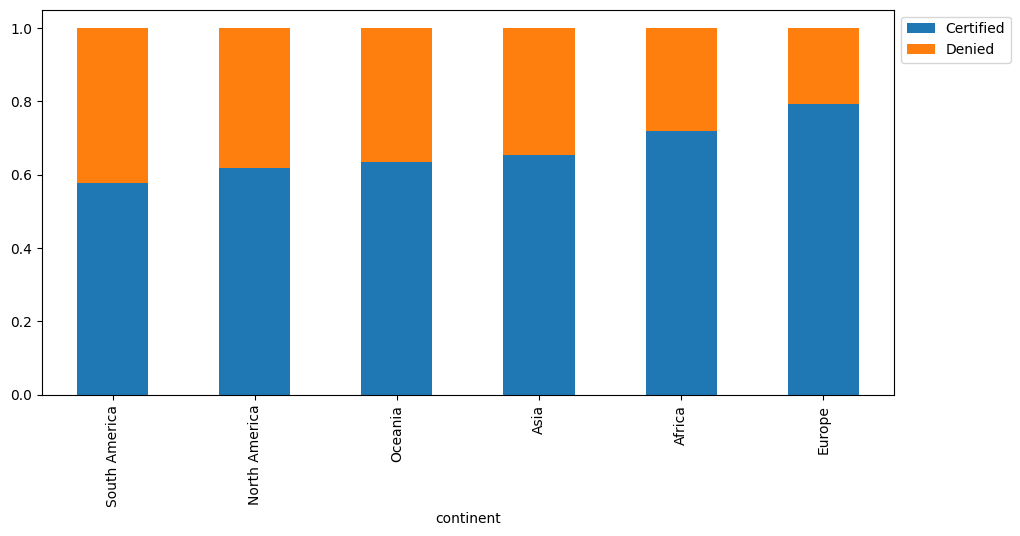

In [ ]:
stacked_barplot(df_copy, 'continent', 'case_status')

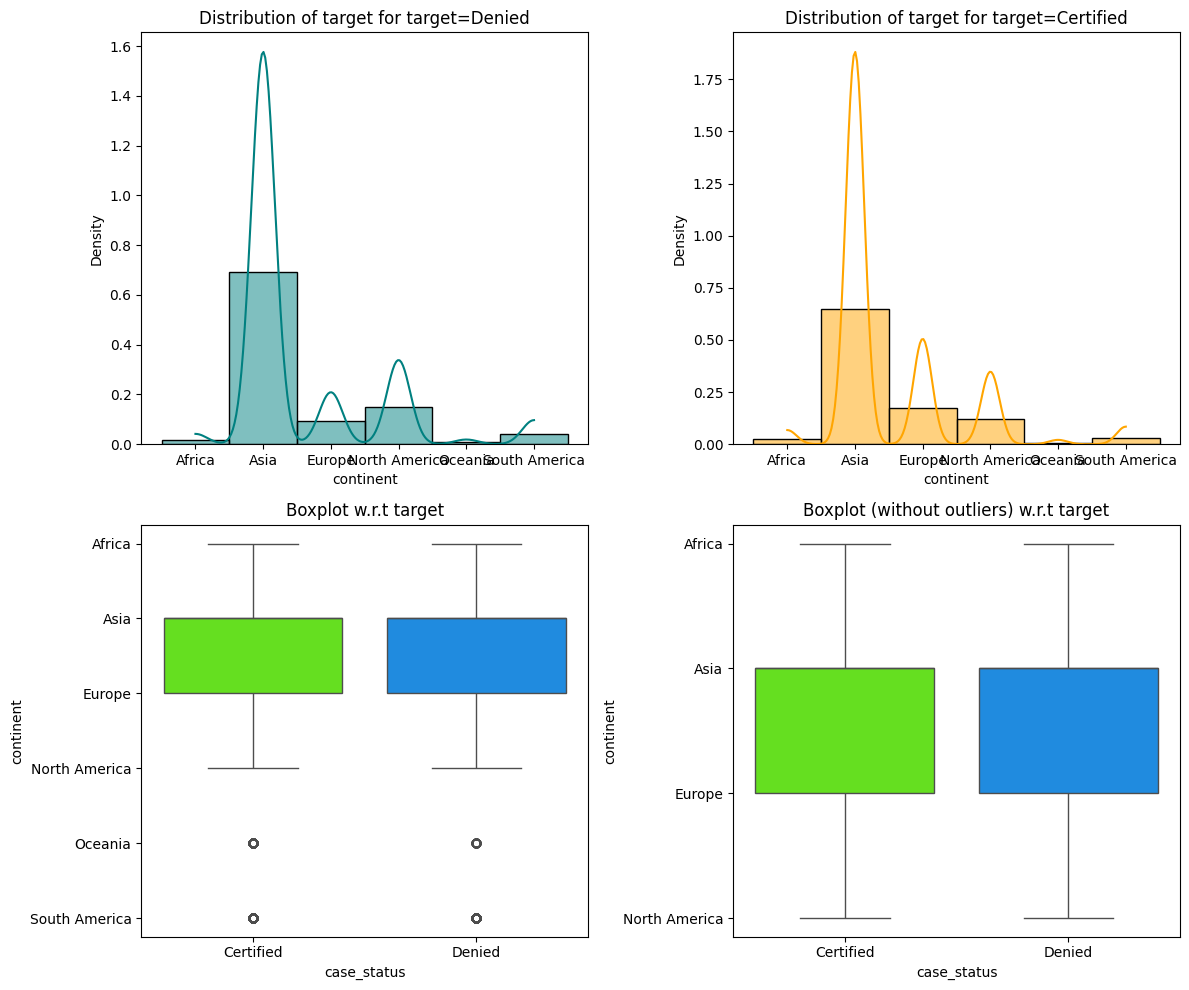

In [ ]:
distribution_plot_wrt_target(df_copy, 'continent', 'case_status')

**Observation**
1. Highest acceptance rate for visa status is from Europe
2. Asia denial rate is approx 40%

#### Does having prior work experience influence the chances of visa certification for career opportunities abroad?

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


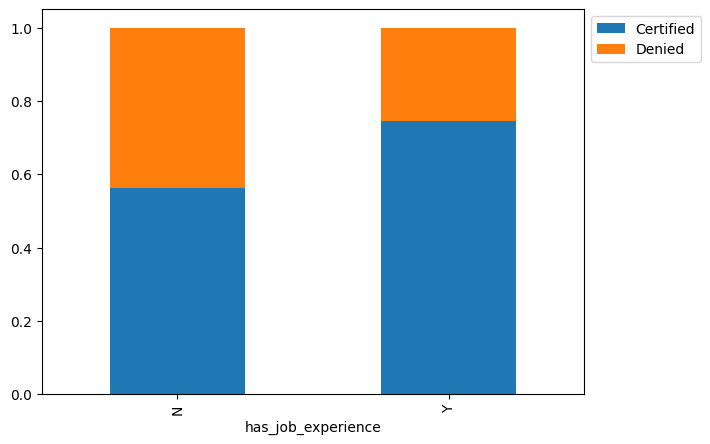

In [ ]:
stacked_barplot(df_copy, 'has_job_experience', 'case_status')

### Does visa status vary with changes in the prevailing wage set to protect both local talent and foreign workers?

In [ ]:
df_copy.groupby('unit_of_wage')['prevailing_wage'].mean()

,prevailing_wage
unit_of_wage,
Hour,414.570513
Month,87592.864045
Week,85606.820515
Year,81228.077133


**Observation**
1. The data shows that the unit_of_wage 'Hour' is a per-day amount, whearas the other three unit_of_wage categories are an annual salary amount.


#### Does the unit of prevailing wage (Hourly, Weekly, etc.) have any impact on the likelihood of visa application certification?

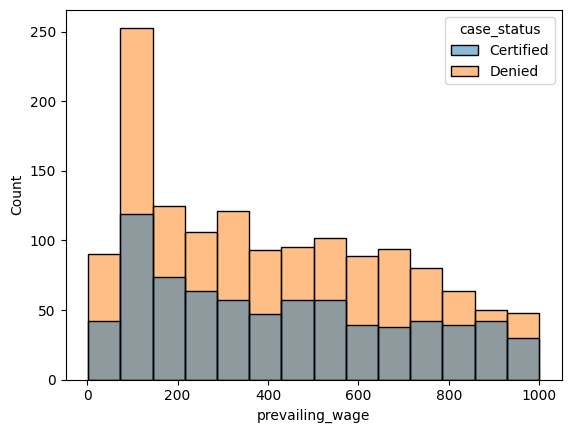

In [ ]:
#create a dataframe only of workers applying for jobs with a *unit_wage* of 'Hour'
df_hourly = df_copy[df_copy.unit_of_wage=='Hour']
#show a distribution of the *prevailing_wage* within this dataframe, along with the ratio of *case_status* within each bin
sns.histplot(data=df_hourly, x='prevailing_wage', hue='case_status')
plt.show()

In [ ]:
#create bins that categorize applicants by the per-day wage of the job he or she is applying for
bins = list(np.arange(0,1100,200))
#assign each applicant to a category
df_hourly['income_per_day'] = pd.cut(df_hourly['prevailing_wage'], bins)
df_hourly.groupby('income_per_day')['case_status'].value_counts()

income_per_day  case_status
(0, 200]        Denied         448
                Certified      219
(200, 400]      Denied         301
                Certified      166
(400, 600]      Denied         274
                Certified      144
(600, 800]      Denied         239
                Certified      116
(800, 1000]     Denied         148
                Certified      102
Name: count, dtype: int64

case_status     Certified  Denied   All
income_per_day                         
All                   747    1410  2157
(0, 200]              219     448   667
(200, 400]            166     301   467
(400, 600]            144     274   418
(600, 800]            116     239   355
(800, 1000]           102     148   250
------------------------------------------------------------------------------------------------------------------------


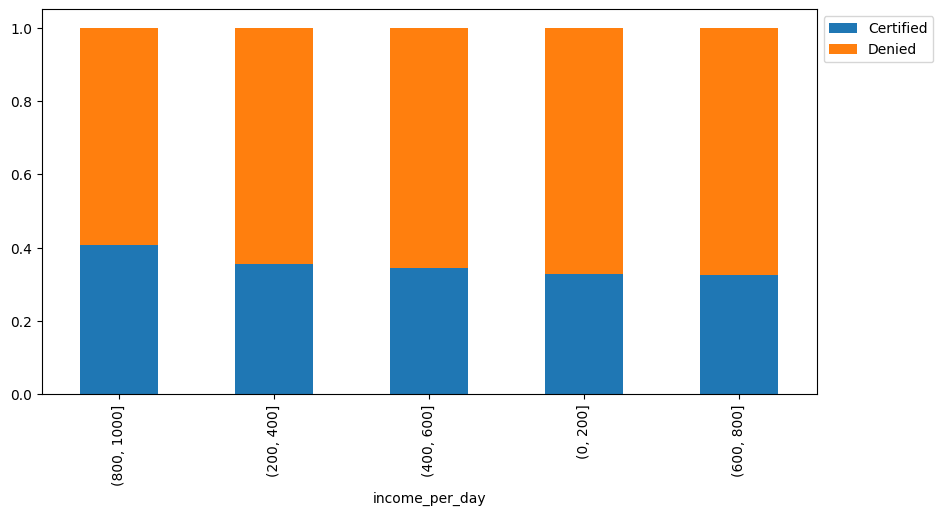

In [ ]:
stacked_barplot(df_hourly, 'income_per_day', 'case_status')

**observation**
1. As the graphs above show, even within applicants for jobs with an 'Hour' prevailing_wage, the ratio of approved to denied applications increases considerably as prevailing_wage increases.
2. Even at the highest income_per_day category, an application is still more likely to be denied than approved.

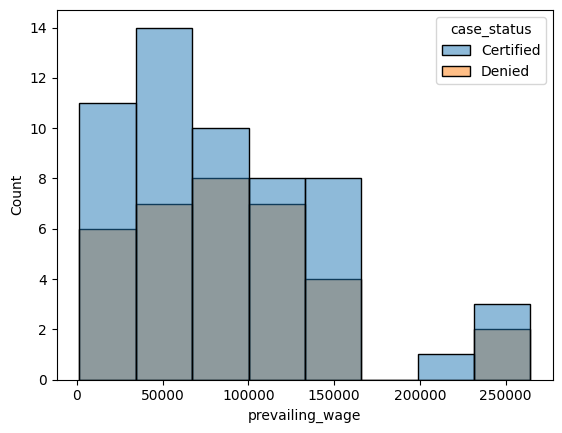

In [ ]:
#create a dataframe only of workers applying for jobs with a *unit_wage* of 'Hour'
df_monthly = df_copy[df_copy.unit_of_wage=='Month']
#show a distribution of the *prevailing_wage* within this dataframe, along with the ratio of *case_status* within each bin
sns.histplot(data=df_monthly, x='prevailing_wage', hue='case_status')
plt.show()

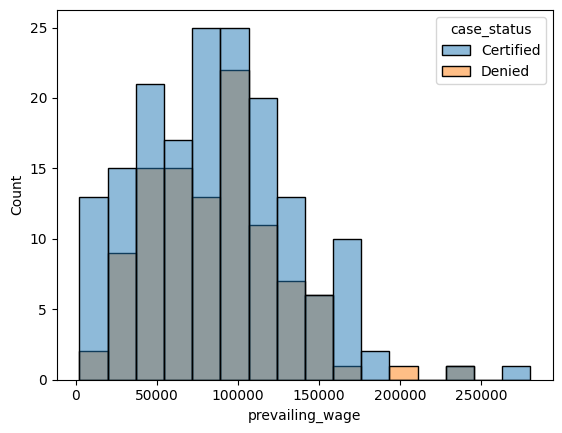

In [ ]:
#create a dataframe only of workers applying for jobs with a *unit_wage* of 'Hour'
df_weekly = df_copy[df_copy.unit_of_wage=='Week']
#show a distribution of the *prevailing_wage* within this dataframe, along with the ratio of *case_status* within each bin
sns.histplot(data=df_weekly, x='prevailing_wage', hue='case_status')
plt.show()

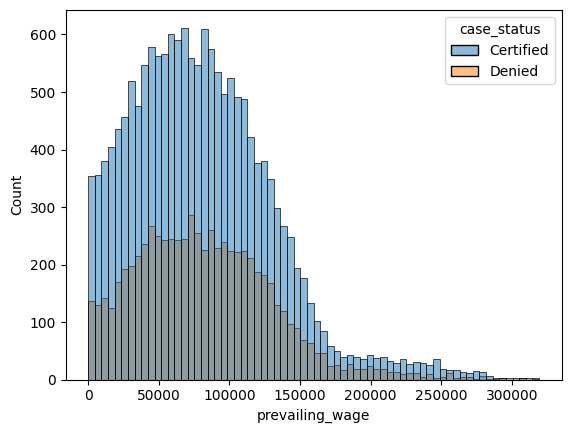

In [ ]:
#create a dataframe only of workers applying for jobs with a *unit_wage* of 'Hour'
df_yearly = df_copy[df_copy.unit_of_wage=='Year']
#show a distribution of the *prevailing_wage* within this dataframe, along with the ratio of *case_status* within each bin
sns.histplot(data=df_yearly, x='prevailing_wage', hue='case_status')
plt.show()

In [ ]:
bins = [0,25000,50000,75000,100000,125000,np.inf]
names = ['$0-25k','$25k-50k','$50k-75k','$75k-100k','$100k-125k','$125k+']
#assign an applicant to a category
df_yearly['income_per_year'] = pd.cut(df_yearly['prevailing_wage'], bins, labels=names)
df_yearly.groupby('income_per_year')['case_status'].value_counts()

income_per_year  case_status
$0-25k           Certified      2066
                 Denied          752
$25k-50k         Certified      2801
                 Denied         1216
$50k-75k         Certified      3101
                 Denied         1342
$75k-100k        Certified      2963
                 Denied         1284
$100k-125k       Certified      2374
                 Denied         1117
$125k+           Certified      2742
                 Denied         1204
Name: count, dtype: int64

case_status      Certified  Denied    All
income_per_year                          
All                  16047    6915  22962
$50k-75k              3101    1342   4443
$75k-100k             2963    1284   4247
$25k-50k              2801    1216   4017
$125k+                2742    1204   3946
$100k-125k            2374    1117   3491
$0-25k                2066     752   2818
------------------------------------------------------------------------------------------------------------------------


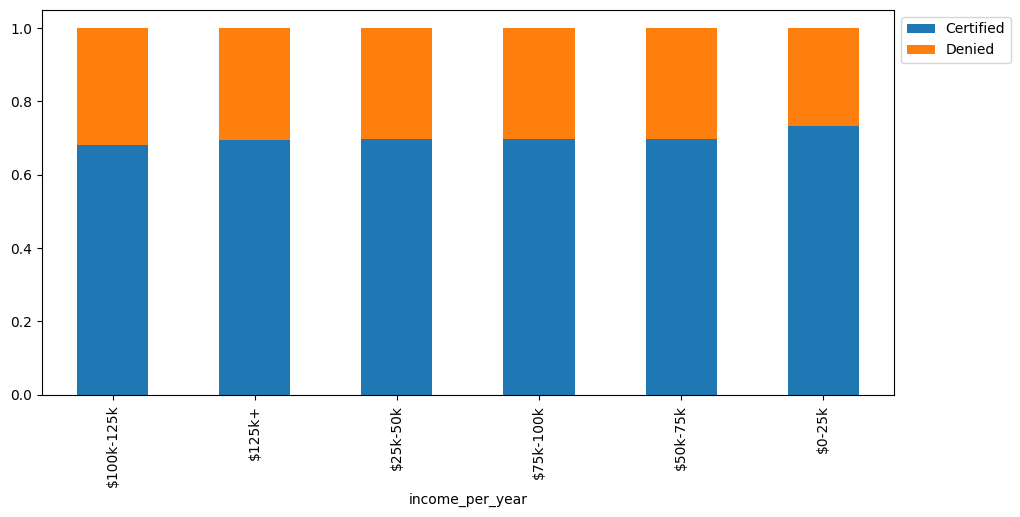

In [ ]:
stacked_barplot(df_yearly, 'income_per_year', 'case_status')

**Observation**
1. The distribution of wages is (as expected) right skewed, indicating a long-tail of jobs with annual salaries above 150,000 dollars.
2. As the distribution above shows, the ratio of approved to denied applications remains approximately equivalent across the range of wages.
3. In support of the observation above, there does not appear to be a significant change in ratio of approved to denied applications as income_per_year increases. To the contrary, the ratio may actually decrease as this prevailing_wage increases.
4. For applications for jobs with an income_per_year wage, the highest concentration of applications is for jobs with 50,000 to 75,000 dollars per year in salary.


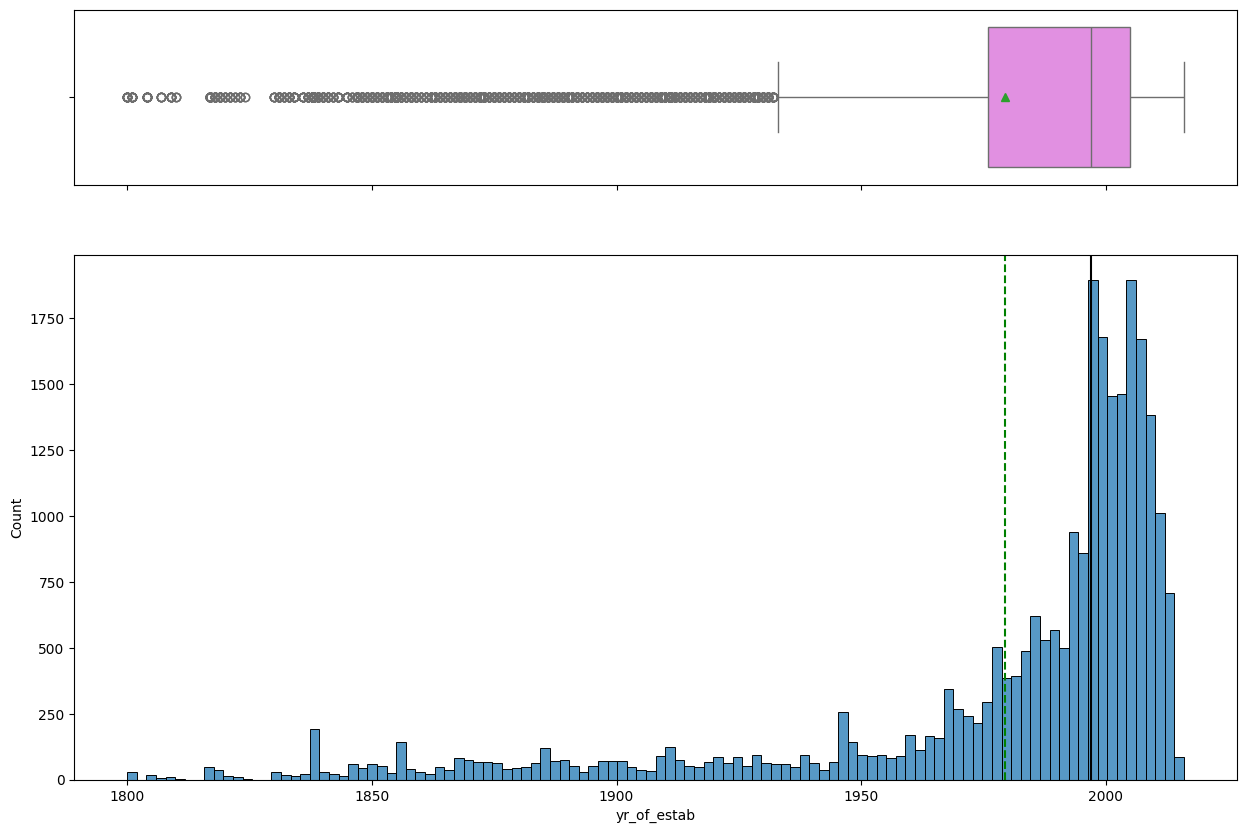

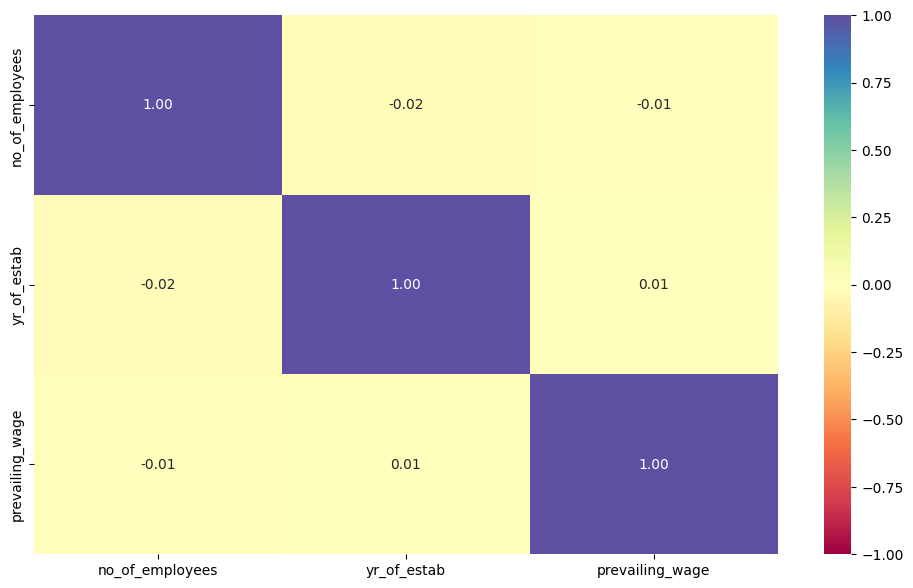

In [ ]:
# Creating a new variable with numerical columns
cols_list = df_copy.select_dtypes(include=np.number).columns.tolist()

# Visualizing a correlation map
plt.figure(figsize=(12, 7))
sns.heatmap(df_copy[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral");

**Observation**
1. There doesn't seem to be any significant correlation between numerical variables.

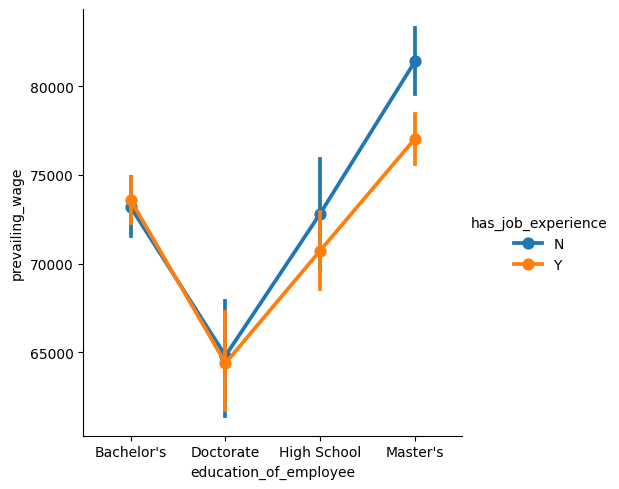

In [ ]:
sns.catplot(data=df_copy, x='education_of_employee', y='prevailing_wage', hue='has_job_experience', kind='point');


**Observation**
1. Higher wages are for employees who have master's degree.
2. At the same time its seen that they have no experience
3. Doctrate degree prevailing wages is less than high school degree holders

## Data Pre-processing

### Outlier Check

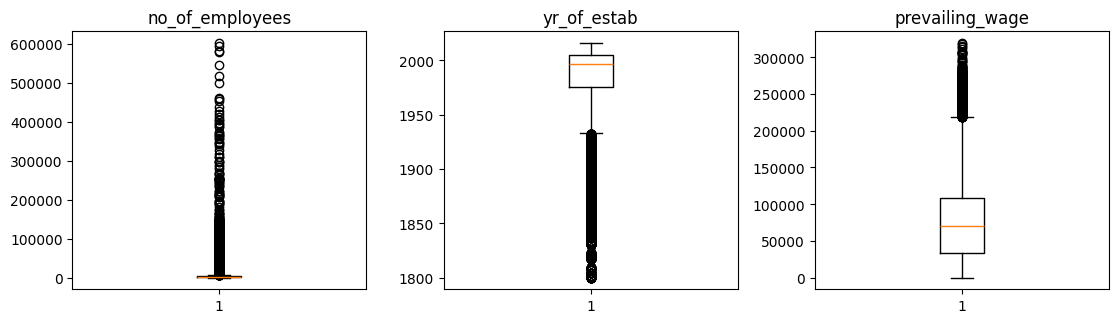

In [ ]:
num_cols = df_copy.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df_copy[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observation**
1. There are a few outliers in the data.
2.  We will not treat them as they are proper values.

** Dropping year of establishment** for data preprocessing

In [ ]:
df_copy.drop(['yr_of_estab'], axis=1, inplace=True)
df_copy.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,Certified


**Observation**
1. Year of establishment has been dropped

In [ ]:
# Defining X (independent) and y (dependent) variables
X = df_copy.drop(['case_status'], axis=1)
y = df_copy['case_status']

print(X.head())
print(y.head())


  continent education_of_employee has_job_experience requires_job_training  \
0      Asia           High School                  N                     N   
1      Asia              Master's                  Y                     N   
2      Asia            Bachelor's                  N                     Y   
3      Asia            Bachelor's                  N                     N   
4    Africa              Master's                  Y                     N   

   no_of_employees region_of_employment  prevailing_wage unit_of_wage  \
0            14513                 West         592.2029         Hour   
1             2412            Northeast       83425.6500         Year   
2            44444                 West      122996.8600         Year   
3               98                 West       83434.0300         Year   
4             1082                South      149907.3900         Year   

  full_time_position  
0                  Y  
1                  Y  
2                  Y  


**Encoding categorical values**

In [ ]:
X = pd.get_dummies(X, dtype=int, columns=X.select_dtypes(include=['object', 'category']).columns.tolist(), drop_first=True)
X.head()

,no_of_employees,prevailing_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
0,14513,592.2029,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
1,2412,83425.6500,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1
2,44444,122996.8600,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1
3,98,83434.0300,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
4,1082,149907.3900,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1


In [122]:
y_enc = y.astype('category').cat.codes

In [123]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(17836, 20) (7644, 20)


In [124]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 20)
Shape of test set :  (7644, 20)
Percentage of classes in training set:
0    0.667919
1    0.332081
Name: proportion, dtype: float64
Percentage of classes in test set:
0    0.667844
1    0.332156
Name: proportion, dtype: float64


## Model Building

**Evaluation Criteria**

1. Predicting an applicant is eligible for visa, but actually not eligible (False positive-FP). This will result in a qualified applicant to miss job opportunity.
2. Predicting an applicant is not eligible for visa(denied), but actually is eligible (False Negative-FN). This will also result in a qualified job applicant to miss job opportunity.

**Which metrics to optimize?**

1. We would want Recall to be maximized, the greater the Recall, higher the changes of minimizing false negatives.Recall is likely the most important metric in predicting visa eligibility, as failing to identify an eligible applicant would mean losing on potential candidate. In addition F1 score is also an important parameter to reduce FP and FNs.
2. This will ensure that a potential applicant who might otherwise contribute positively to the country is not being unfairly rejected.
3. Missing eligible applicants could mean missing out on valuable candidates, such as skilled professionals or students.
4. On the other hand, if there are ineligible candidate, who are marked as eligible, there are other subsequent screening steps that can filter them out.
5. We would want to focus on Recall and F1 score.

### Model Evaluation Criterion

- Choose the primary metric to evaluate the model on
- Elaborate on the rationale behind choosing the metric

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The `model_performance_classification_sklearn` function will be used to check the model performance of models.
* The `confusion_matrix_sklearn` function will be used to plot the confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Defining scorer to be used for cross-validation and hyperparameter tuning

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model building with Original data

** Decision Tree (Original Data) **

In [125]:
d_tree = DecisionTreeClassifier(class_weight = 'balanced', random_state=1)
d_tree.fit(X_train,y_train)



DecisionTreeClassifier(class_weight='balanced', random_state=1)

In [126]:
#print(classification_report(y_test, d_tree.predict(X_test), target_names=["Denied","Certified"]))
print (classification_report(y_train, d_tree.predict(X_train), target_names=["Denied","Certified"]))


              precision    recall  f1-score   support

      Denied       1.00      1.00      1.00     11913
   Certified       1.00      1.00      1.00      5923

    accuracy                           1.00     17836
   macro avg       1.00      1.00      1.00     17836
weighted avg       1.00      1.00      1.00     17836



Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.664704  0.482473    0.49515  0.488729


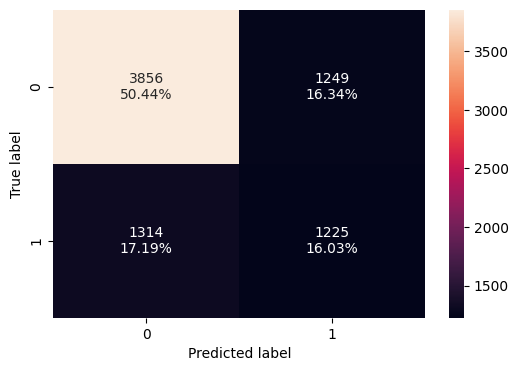

In [127]:
#Calculating different metrics
dtree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",dtree_model_train_perf)
dtree_model_val_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",dtree_model_val_perf)
#Creating confusion matrix
confusion_matrix_sklearn(d_tree, X_test, y_test)

In [133]:
X_train.head()

,no_of_employees,prevailing_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
5999,1073,86487.83,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1
6788,2000,19628.24,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1
22447,3521,89905.36,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1
6341,1869,102972.01,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1
7871,483,57757.57,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,1


In [128]:
# Decision Tree Feature Importance
#pd.Series(d_tree.feature_importances_, index=X_train.columns, columns=["imp"]).sort_values(ascending=False)

feature_imp = pd.DataFrame(d_tree.feature_importances_, index=X_train.columns, columns=["imp"])
feature_imp.sort_values(by="imp", ascending=False)

,imp
prevailing_wage,0.352032
no_of_employees,0.322787
education_of_employee_High School,0.069131
has_job_experience_Y,0.054285
education_of_employee_Master's,0.024836
continent_Europe,0.021037
education_of_employee_Doctorate,0.018708
region_of_employment_Midwest,0.018491
region_of_employment_South,0.017722
requires_job_training_Y,0.015819


**Observations:**
1. Prevailing wage and number of employees are higher weightage fields determining the accuracy of visa eligibility.
2. Number of employees is next major field. That means that employer having higher number of employees, applicant having higher prevailing wage and higher education has more chances of getting visa accepted.

It seems the classes are imbalanced.

In [134]:
#Metrics so far. Create empty dataframe
df_metrics = pd.DataFrame(columns=[
    "Accuracy", "Recall", "Precision", "F1",
    "Test/Train/Val", "Model Name", "Data Type", "Model Variable"
    ])

In [135]:
def add_metric_row(df_metrics, model_perf, model_name, test_train_val, data_type, model_variable):
    """
    Adds a new row of performance metrics to the DataFrame.

    Parameters:
    df_metrics (pd.DataFrame): The dataframe to which the new row will be added.
    model_perf (pd.DataFrame): The model performance dataframe (train or test performance).
    model_name (str): The name of the model.
    test_train_val (str): The identifier for the data set (Train, Test, or Val).
    data_type (str): The type of data used (Original, Augmented, etc.).
    model_variable (str): The variable name for the model performance dataframe.

    Returns:
    pd.DataFrame: Updated dataframe with the new row.
    """
    # Create a new row dictionary
    new_row = {
        "Accuracy": model_perf.iloc[0, 0],
        "Recall": model_perf.iloc[0, 1],
        "Precision": model_perf.iloc[0, 2],
        "F1": model_perf.iloc[0, 3],
        "Test/Train/Val": test_train_val,
        "Model Name": model_name,
        "Data Type": data_type,
        "Model Variable": model_variable
    }

    # Add the new row to the dataframe
    df_metrics.loc[len(df_metrics)] = new_row
    return df_metrics

In [136]:
df_metrics = add_metric_row(df_metrics, dtree_model_train_perf, "Decision Tree", "Train", "Original", "dtree_model_train_perf")
df_metrics = add_metric_row(df_metrics, dtree_model_val_perf, "Decision Tree", "Validation", "Original", "dtree_model_val_perf")
df_metrics

,Accuracy,Recall,Precision,F1,Test/Train/Val,Model Name,Data Type,Model Variable
0,1.000000,1.000000,1.00000,1.000000,Train,Decision Tree,Original,dtree_model_train_perf
1,0.664704,0.482473,0.49515,0.488729,Validation,Decision Tree,Original,dtree_model_val_perf


** Random Forest **

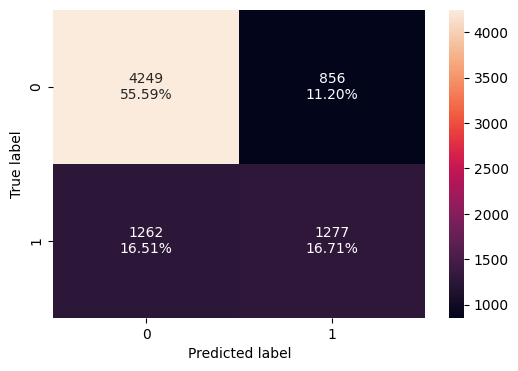

In [138]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
rf_estimator_model_val_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator, X_test, y_test)


In [139]:
df_metrics = add_metric_row(df_metrics, rf_estimator_model_train_perf, "Random Forest", "Train", "Original", "rf_estimator_model_train_perf")
df_metrics = add_metric_row(df_metrics, rf_estimator_model_val_perf, "Random Forest", "Validation", "Original", "rf_estimator_model_val_perf")

#Print df_metrics
df_metrics[(df_metrics['Model Name'].str.contains('Random Forest'))]

,Accuracy,Recall,Precision,F1,Test/Train/Val,Model Name,Data Type,Model Variable
2,0.999888,0.999662,1.000000,0.999831,Train,Random Forest,Original,rf_estimator_model_train_perf
3,0.722920,0.502954,0.598687,0.546661,Validation,Random Forest,Original,rf_estimator_model_val_perf


** Bagging Classifier **

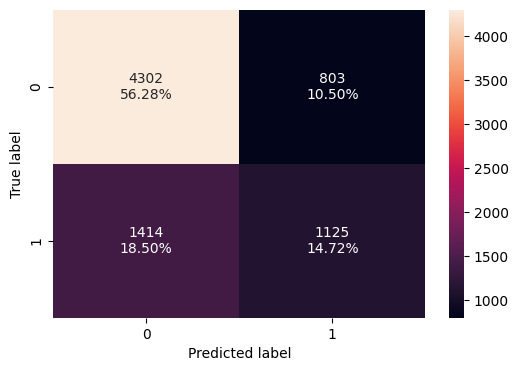

In [141]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
bagging_classifier_model_val_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

In [142]:
df_metrics = add_metric_row(df_metrics, bagging_classifier_model_train_perf, "Bagging Classifier", "Train", "Original", "bagging_classifier_model_train_perf")
df_metrics = add_metric_row(df_metrics, bagging_classifier_model_val_perf, "Bagging Classifier", "Validation", "Original", "bagging_classifier_model_val_perf")

#Print df_metrics
df_metrics[(df_metrics['Model Name'].str.contains('Bagging Classifier'))]

,Accuracy,Recall,Precision,F1,Test/Train/Val,Model Name,Data Type,Model Variable
4,0.976564,0.938207,0.990729,0.963753,Train,Bagging Classifier,Original,bagging_classifier_model_train_perf
5,0.709969,0.443088,0.583506,0.503694,Validation,Bagging Classifier,Original,bagging_classifier_model_val_perf


** Ada Boost **

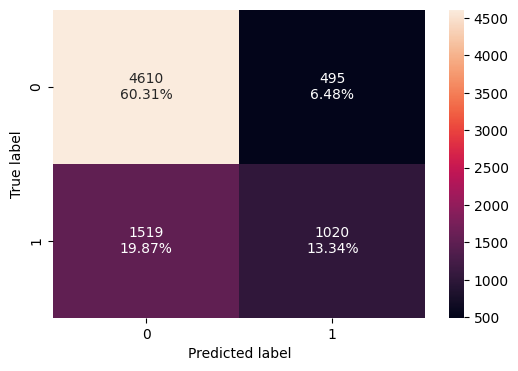

In [143]:
#Fitting the model
AdaBoost_model = AdaBoostClassifier(random_state=1)
AdaBoost_model.fit(X_train,y_train)

#Calculating different metrics
AdaBoost_model_train_perf=model_performance_classification_sklearn(AdaBoost_model,X_train,y_train)
AdaBoost_model_val_perf=model_performance_classification_sklearn(AdaBoost_model,X_test,y_test)
#Creating confusion matrix
confusion_matrix_sklearn(AdaBoost_model, X_test, y_test)


In [144]:
df_metrics = add_metric_row(df_metrics, AdaBoost_model_train_perf, "AdaBoost", "Train", "Original", "AdaBoost_model_train_perf")
df_metrics = add_metric_row(df_metrics, AdaBoost_model_val_perf, "AdaBoost", "Validation", "Original", "AdaBoost_model_val_perf")

#Print df_metrics
df_metrics[(df_metrics['Model Name'].str.contains('AdaBoost'))]

,Accuracy,Recall,Precision,F1,Test/Train/Val,Model Name,Data Type,Model Variable
6,0.735983,0.407901,0.667772,0.506446,Train,AdaBoost,Original,AdaBoost_model_train_perf
7,0.736525,0.401733,0.673267,0.503207,Validation,AdaBoost,Original,AdaBoost_model_val_perf


** Observations: **
1. The good part is that Adaboost has not overfit. The performance of training and test sets are very close, however the performance is weak.The recall is less than 50%. Only 296 out of (466+296) were predicted right.

** Gradient Boost **

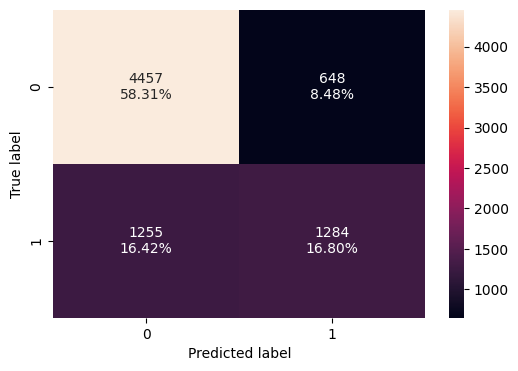

In [146]:
#Fitting the model
GradientBoosting_model = GradientBoostingClassifier(random_state=1)
GradientBoosting_model.fit(X_train,y_train)

#Calculating different metrics
GradientBoosting_model_train_perf=model_performance_classification_sklearn(GradientBoosting_model,X_train,y_train)
GradientBoosting_model_val_perf=model_performance_classification_sklearn(GradientBoosting_model,X_test,y_test)
#Creating confusion matrix
confusion_matrix_sklearn(GradientBoosting_model, X_test,y_test)

In [147]:
df_metrics = add_metric_row(df_metrics, GradientBoosting_model_train_perf, "GradientBoost", "Train", "Original", "GradientBoosting_model_train_perf")
df_metrics = add_metric_row(df_metrics, GradientBoosting_model_val_perf, "GradientBoost", "Validation", "Original", "GradientBoosting_model_val_perf")

#Print df_metrics
df_metrics[(df_metrics['Model Name'].str.contains('GradientBoost'))]

,Accuracy,Recall,Precision,F1,Test/Train/Val,Model Name,Data Type,Model Variable
8,0.754822,0.512240,0.671536,0.581170,Train,GradientBoost,Original,GradientBoosting_model_train_perf
9,0.751047,0.505711,0.664596,0.574368,Validation,GradientBoost,Original,GradientBoosting_model_val_perf


** Observation **

The recall value has been improved to 50%

** XG boost classifier **

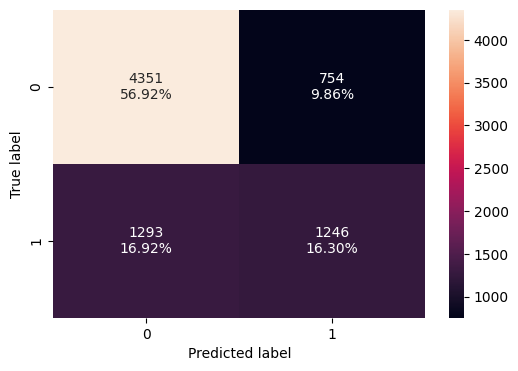

In [149]:
#Fitting the model
XGBoost_model = XGBClassifier(random_state=1)
XGBoost_model.fit(X_train,y_train)

#Calculating different metrics
XGBoost_model_train_perf=model_performance_classification_sklearn(XGBoost_model,X_train,y_train)
XGBoost_model_val_perf=model_performance_classification_sklearn(XGBoost_model,X_test,y_test)
#Creating confusion matrix
confusion_matrix_sklearn(XGBoost_model, X_test, y_test)

In [150]:
df_metrics = add_metric_row(df_metrics, XGBoost_model_train_perf, "XGBoost", "Train", "Original", "XGBoost_model_train_perf")
df_metrics = add_metric_row(df_metrics, XGBoost_model_val_perf, "XGBoost", "Validation", "Original", "XGBoost_model_val_perf")

#Print df_metrics
df_metrics[(df_metrics['Model Name'].str.contains('XGBoost'))]

,Accuracy,Recall,Precision,F1,Test/Train/Val,Model Name,Data Type,Model Variable
10,0.828941,0.635995,0.808022,0.711762,Train,XGBoost,Original,XGBoost_model_train_perf
11,0.732208,0.490744,0.623000,0.549020,Validation,XGBoost,Original,XGBoost_model_val_perf


** Metrics Compare **

In [151]:
#Print the metrics for all 6 models on original dataset
df_metrics

,Accuracy,Recall,Precision,F1,Test/Train/Val,Model Name,Data Type,Model Variable
0,1.000000,1.000000,1.000000,1.000000,Train,Decision Tree,Original,dtree_model_train_perf
1,0.664704,0.482473,0.495150,0.488729,Validation,Decision Tree,Original,dtree_model_val_perf
2,0.999888,0.999662,1.000000,0.999831,Train,Random Forest,Original,rf_estimator_model_train_perf
3,0.722920,0.502954,0.598687,0.546661,Validation,Random Forest,Original,rf_estimator_model_val_perf
4,0.976564,0.938207,0.990729,0.963753,Train,Bagging Classifier,Original,bagging_classifier_model_train_perf
5,0.709969,0.443088,0.583506,0.503694,Validation,Bagging Classifier,Original,bagging_classifier_model_val_perf
6,0.735983,0.407901,0.667772,0.506446,Train,AdaBoost,Original,AdaBoost_model_train_perf
7,0.736525,0.401733,0.673267,0.503207,Validation,AdaBoost,Original,AdaBoost_model_val_perf
8,0.754822,0.512240,0.671536,0.581170,Train,GradientBoost,Original,GradientBoosting_model_train_perf
9,0.751047,0.505711,0.664596,0.574368,Validation,GradientBoost,Original,GradientBoosting_model_val_perf


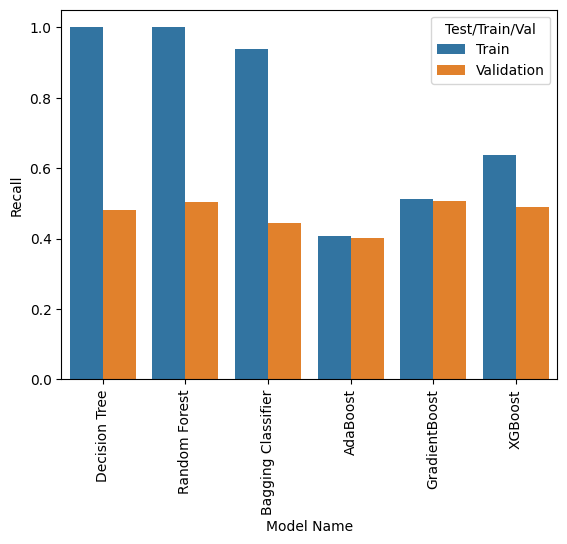

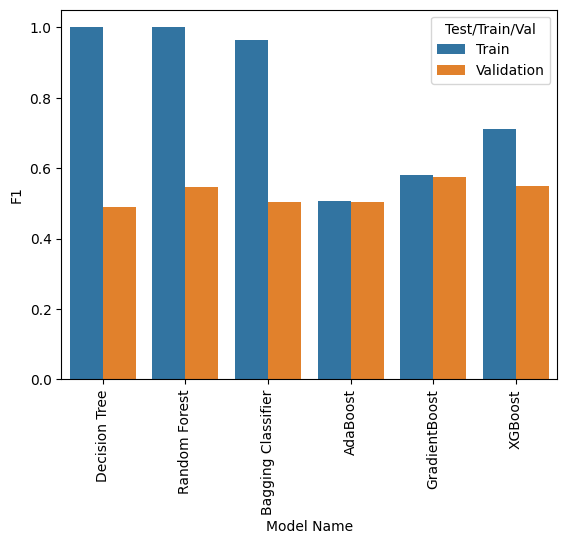

In [152]:
sns.barplot(data=df_metrics, x="Model Name", y="Recall", hue="Test/Train/Val")
# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)
plt.show()

sns.barplot(data=df_metrics, x="Model Name", y="F1", hue="Test/Train/Val")
# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)
plt.show()

** Observations:**

1. F1 and Recall score for training data is highest (near perfect) for Decision Tree, Random Forest and Bagging Classifier, however the model performs poorly on test set.
2. Recall score is low for training data for AdaBoost(0.4) , GradientBoost((0.5) and XGBoost(0.67), but model generalizes well on validation data for these models. Similarly F1 score is low for training data for AdaBoost(0.5) , GradientBoost (0.58), but model generalizes well on validation data for these models. On other hand F1 score is higher for XGBoost(0.75) on train data, but drops on validation data.
3. Similar observation for Precision as well where AdaBoost, GradientBoost and XGBoost generalizes the validation data better.
4. Recall score on validation set (Order of models): DecisionTree > GradientB > XGB > RandomF > BaggingC > AdaBoost
5. It is recommended to see the drop in Recall from training set to test set.


In [156]:
print("\nTraining and Validation Performance Difference for Recall Scores:\n")

# Initialize train_recall and val_recall for each row
train_recall = 0.00  # Initialize to 0 for Train
val_recall = 0.00  # Initialize to 0 for Validation

#Read each row in df_metrics and find difference of Recall column  data_type=Train  and data_type=Validation
for index, row in df_metrics.iterrows():

    if row['Test/Train/Val'] == 'Train' and row['Data Type'] == 'Original':
        train_recall = row['Recall']
        #print(train_recall)
    elif row['Test/Train/Val'] == 'Validation' and row['Data Type'] == 'Original':
        val_recall = row['Recall']
        #print(val_recall)
    if ((train_recall > 0.00)  and (val_recall > 0.00)):
        difference1 = train_recall - val_recall
        print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(row['Model Name'], train_recall, val_recall, difference1))
        train_recall = 0.00
        val_recall = 0.00
        difference1 = 0.00

#print("\nTraining and Validation Performance Difference for Precision Scores:\n")

# Initialize train_Precision and val_Precision for each row
train_F1 = 0.00  # Initialize to 0 for Train
val_F1 = 0.00  # Initialize to 0 for Validation

#Read each row in df_metrics and find difference of Precision column  data_type=Train  and data_type=Validation
for index, row in df_metrics.iterrows():

    if row['Test/Train/Val'] == 'Train' and row['Data Type'] == 'Original':
        train_Precision = row['F1']
        #print(train_Precision)
    elif row['Test/Train/Val'] == 'Validation' and row['Data Type'] == 'Original':
        val_Precision = row['F1']
        #print(val_Precision)

    if ((train_F1 > 0.00)  and (val_F1 > 0.00)):
        difference1 = train_F1 - val_F1
        print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(row['Model Name'], train_F1, val_F1, difference1))
        train_F1 = 0.00
        val_F1 = 0.00
        difference1 = 0.00


Training and Validation Performance Difference for Recall Scores:

Decision Tree: Training Score: 1.0000, Validation Score: 0.4825, Difference: 0.5175
Random Forest: Training Score: 0.9997, Validation Score: 0.5030, Difference: 0.4967
Bagging Classifier: Training Score: 0.9382, Validation Score: 0.4431, Difference: 0.4951
AdaBoost: Training Score: 0.4079, Validation Score: 0.4017, Difference: 0.0062
GradientBoost: Training Score: 0.5122, Validation Score: 0.5057, Difference: 0.0065
XGBoost: Training Score: 0.6360, Validation Score: 0.4907, Difference: 0.1453


Observations: With default parameters:

1. Accuracy is highest for Gradient boosting classifier. For rest, it is pretty much the same for all models (65% to 75% range)
2. Difference in Recall score on Trainig and validation set (Order of models): AdaBoost < GradientB < XGB < DecisionTree < BaggingC < RandomF
3. Difference in Precision score on Training and validation set (Order of models): GradientB < AdaBoost < XGB < RandomF < BaggingC < DecisionTree
4. Difference in F1 score on Training and validation set (Order of models): AdaBoost < GradientB < XGB < RandomF < BaggingC < DecisionTree
5. This means that AdaBoost, GradientBoost and XGB are generalizing well and should be considered further for tuning.

### Model Building with Oversampled data

In [158]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
#strategy=0.4 that means after applying SMOTE, the resulting dataset should have ratio of 1:0.4 (100 nont eligible, 40 eligible)
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy=0.65, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label '1': 5923
Before OverSampling, counts of label '0': 11913 

After OverSampling, counts of label '1': 7743
After OverSampling, counts of label '0': 11913 

After OverSampling, the shape of train_X: (19656, 20)
After OverSampling, the shape of train_y: (19656,) 



------------------------------------------------------------------------
-----------------Model-1: Decision Tree Model---------------------------
------------------------------------------------------------------------
------------------------------------------------------------------------
--------------Model-2: Random Forest Classifer--------------------------
------------------------------------------------------------------------
------------------------------------------------------------------------
------------------Model-3: Bagging Classifer----------------------------
------------------------------------------------------------------------
------------------------------------------------------------------------
-----------------Model-4: AdaBoost Classifer----------------------------
------------------------------------------------------------------------
------------------------------------------------------------------------
--------------Model-5: Gradient Boost Classifer----

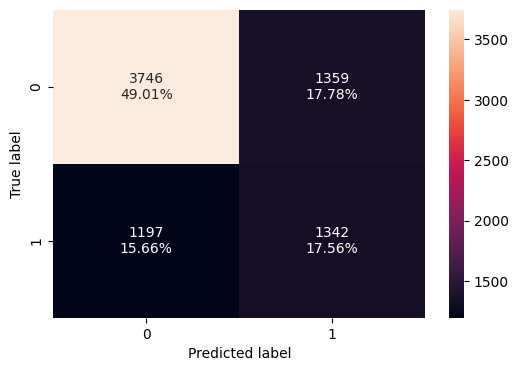

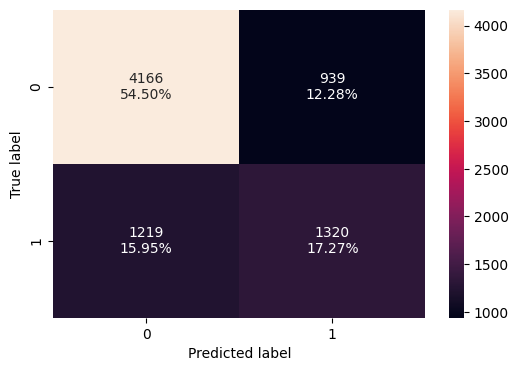

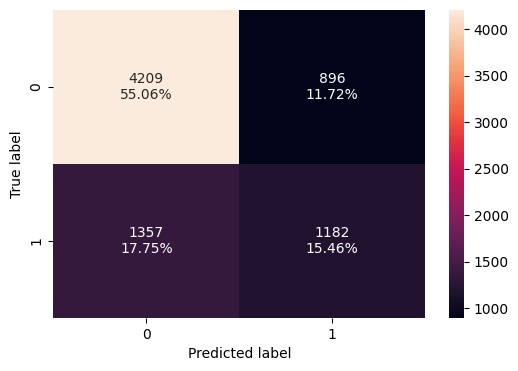

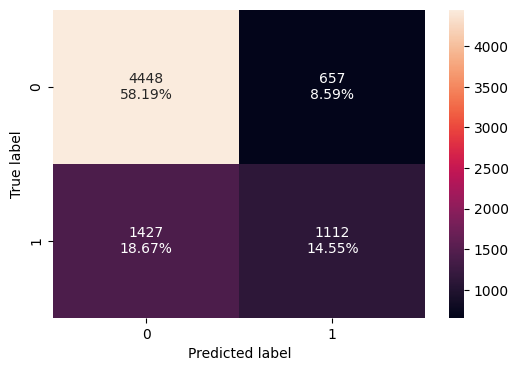

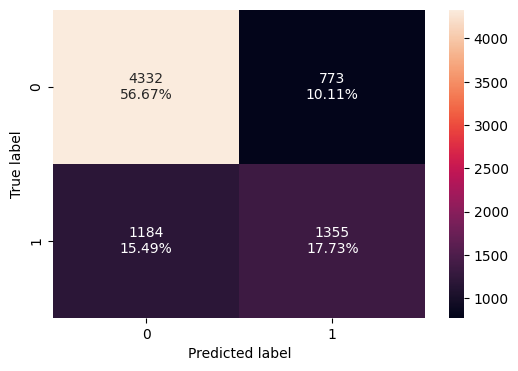

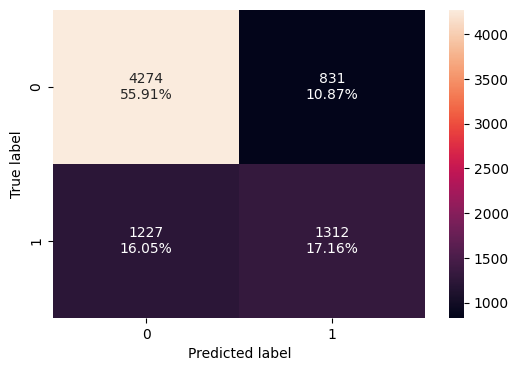

In [162]:
#Model with oversampled data
#Model-1: Decision Tree
X_val = X_test
y_val = y_test

print('------------------------------------------------------------------------')
print('-----------------Model-1: Decision Tree Model---------------------------')
print('------------------------------------------------------------------------')
d_tree1 = DecisionTreeClassifier(random_state=1)
d_tree1.fit(X_train_over,y_train_over)
pred_train1 = d_tree1.predict(X_train_over)
pred_val1 = d_tree1.predict(X_test)
#Calculating different metrics
dtree1_model_train_perf=model_performance_classification_sklearn(d_tree1,X_train_over,y_train_over)
dtree1_model_val_perf=model_performance_classification_sklearn(d_tree1,X_test,y_test)
#Creating confusion matrix
confusion_matrix_sklearn(d_tree1, X_test, y_test)

#Metrics Append
df_metrics = add_metric_row(df_metrics, dtree1_model_train_perf, "Decision Tree", "Train", "Oversampled", "dtree1_model_train_perf")
df_metrics = add_metric_row(df_metrics, dtree1_model_val_perf, "Decision Tree", "Validation", "Oversampled", "dtree1_model_val_perf")

print('------------------------------------------------------------------------')
print('--------------Model-2: Random Forest Classifer--------------------------')
print('------------------------------------------------------------------------')
#Model-2 RandomForest Classifier
rf_estimator1 = RandomForestClassifier(random_state=1)
rf_estimator1.fit(X_train_over,y_train_over)
pred_RF_classifer_train1 = rf_estimator1.predict(X_train_over)
pred_RF_classifer_val1 = rf_estimator1.predict(X_val)
#Calculating different metrics
rf_estimator1_model_train_perf=model_performance_classification_sklearn(rf_estimator1,X_train_over,y_train_over)
rf_estimator1_model_val_perf=model_performance_classification_sklearn(rf_estimator1,X_val,y_val)
#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator1, X_val, y_val)

#Metrics Append
df_metrics = add_metric_row(df_metrics, rf_estimator1_model_train_perf, "Random Forest", "Train", "Oversampled", "rf_estimator1_model_train_perf")
df_metrics = add_metric_row(df_metrics, rf_estimator1_model_val_perf, "Random Forest", "Validation", "Oversampled", "rf_estimator1_model_val_perf")

print('------------------------------------------------------------------------')
print('------------------Model-3: Bagging Classifer----------------------------')
print('------------------------------------------------------------------------')
#Model-3 Bagging Classifier
bagging_classifier1 = BaggingClassifier(random_state=1)
bagging_classifier1.fit(X_train_over,y_train_over)
#Calculating different metrics
bagging_classifier1_model_train_perf=model_performance_classification_sklearn(bagging_classifier1,X_train_over,y_train_over)
bagging_classifier1_model_val_perf=model_performance_classification_sklearn(bagging_classifier1,X_val,y_val)
#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier1, X_val, y_val)

#Metrics Append
df_metrics = add_metric_row(df_metrics, bagging_classifier1_model_train_perf, "Bagging Classifier", "Train", "Oversampled", "bagging_classifier1_model_train_perf")
df_metrics = add_metric_row(df_metrics, bagging_classifier1_model_val_perf, "Bagging Classifier", "Validation", "Oversampled", "bagging_classifier1_model_val_perf")


print('------------------------------------------------------------------------')
print('-----------------Model-4: AdaBoost Classifer----------------------------')
print('------------------------------------------------------------------------')
#Model-4 AdaBoost Classifier
AdaBoost_model1 = AdaBoostClassifier(random_state=1)
AdaBoost_model1.fit(X_train_over,y_train_over)
#Calculating different metrics
AdaBoost1_model_train_perf=model_performance_classification_sklearn(AdaBoost_model1,X_train_over,y_train_over)
AdaBoost1_model_val_perf=model_performance_classification_sklearn(AdaBoost_model1,X_val,y_val)
#Creating confusion matrix
confusion_matrix_sklearn(AdaBoost_model1, X_val, y_val)

#Metrics Append
df_metrics = add_metric_row(df_metrics, AdaBoost1_model_train_perf, "AdaBoost", "Train", "Oversampled", "AdaBoost1_model_train_perf")
df_metrics = add_metric_row(df_metrics, AdaBoost1_model_val_perf, "AdaBoost", "Validation", "Oversampled", "AdaBoost1_model_val_perf")

print('------------------------------------------------------------------------')
print('--------------Model-5: Gradient Boost Classifer-------------------------')
print('------------------------------------------------------------------------')
#Model-5 Gradient Boost Classifier
GradientBoosting_model1 = GradientBoostingClassifier(random_state=1)
GradientBoosting_model1.fit(X_train_over,y_train_over)
#Calculating different metrics
GradientBoosting_model1_train_perf=model_performance_classification_sklearn(GradientBoosting_model1,X_train_over,y_train_over)
GradientBoosting_model1_val_perf=model_performance_classification_sklearn(GradientBoosting_model1,X_val,y_val)
#Creating confusion matrix
confusion_matrix_sklearn(GradientBoosting_model1, X_val, y_val)

#Metrics Append
df_metrics = add_metric_row(df_metrics, GradientBoosting_model1_train_perf, "GradientBoost", "Train", "Oversampled", "GradientBoosting_model1_train_perf")
df_metrics = add_metric_row(df_metrics, GradientBoosting_model1_val_perf, "GradientBoost", "Validation", "Oversampled", "GradientBoosting_model1_val_perf")

print('------------------------------------------------------------------------')
print('----------------Model-6: XGBoost Classifer------------------------------')
print('------------------------------------------------------------------------')
# Model-6 XBBoost Classifer
XGBoost_model1 = XGBClassifier(random_state=1)
XGBoost_model1.fit(X_train_over,y_train_over)
#Calculating different metrics
XGBoost_model1_train_perf=model_performance_classification_sklearn(XGBoost_model1,X_train_over,y_train_over)
XGBoost_model1_val_perf=model_performance_classification_sklearn(XGBoost_model1,X_val,y_val)
#Creating confusion matrix
confusion_matrix_sklearn(XGBoost_model1, X_val, y_val)

#Metrics Append
df_metrics = add_metric_row(df_metrics, XGBoost_model1_train_perf, "XGBoost", "Train", "Oversampled", "XGBoost_model1_train_perf")
df_metrics = add_metric_row(df_metrics, XGBoost_model1_val_perf, "XGBoost", "Validation", "Oversampled", "XGBoost_model1_val_perf")

** Print the performance for all models **

In [163]:
#Print df_metrics
df_metrics[(df_metrics['Data Type'].str.contains('Oversampled'))]


,Accuracy,Recall,Precision,F1,Test/Train/Val,Model Name,Data Type,Model Variable
12,1.000000,1.000000,1.000000,1.000000,Train,Decision Tree,Oversampled,dtree1_model_train_perf
13,0.665620,0.528555,0.496853,0.512214,Validation,Decision Tree,Oversampled,dtree1_model_val_perf
14,1.000000,1.000000,1.000000,1.000000,Train,Decision Tree,Oversampled,dtree1_model_train_perf
15,0.665620,0.528555,0.496853,0.512214,Validation,Decision Tree,Oversampled,dtree1_model_val_perf
16,1.000000,1.000000,1.000000,1.000000,Train,Decision Tree,Oversampled,dtree1_model_train_perf
17,0.665620,0.528555,0.496853,0.512214,Validation,Decision Tree,Oversampled,dtree1_model_val_perf
18,0.999847,0.999742,0.999871,0.999806,Train,Random Forest,Oversampled,rf_estimator1_model_train_perf
19,0.717687,0.519890,0.584329,0.550229,Validation,Random Forest,Oversampled,rf_estimator1_model_val_perf
20,0.977768,0.953765,0.989416,0.971263,Train,Bagging Classifier,Oversampled,bagging_classifier1_model_train_perf
21,0.705259,0.465538,0.568816,0.512021,Validation,Bagging Classifier,Oversampled,bagging_classifier1_model_val_perf


** Metrics Compare **

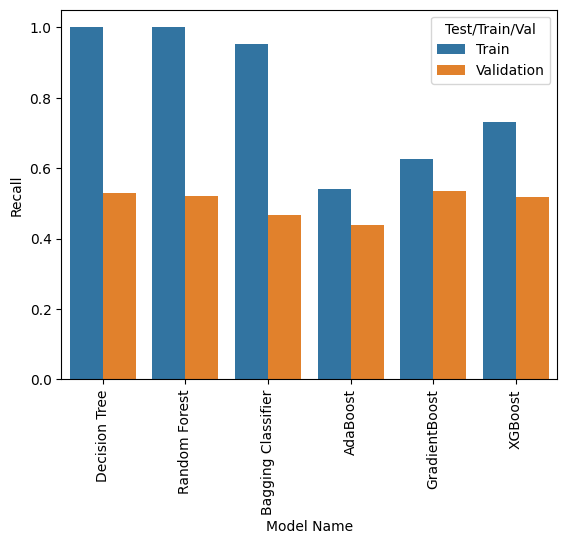

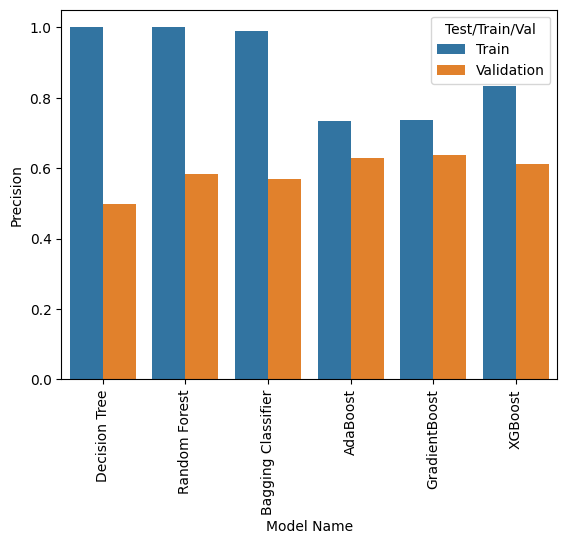

In [164]:
sns.barplot(data=df_metrics[df_metrics['Data Type']=='Oversampled'], x="Model Name", y="Recall", hue="Test/Train/Val") # Changed df_metricsp to df_metrics and df to df_metrics
# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)
plt.show()

sns.barplot(data=df_metrics[df_metrics['Data Type']=='Oversampled'], x="Model Name", y="Precision", hue="Test/Train/Val") # Changed df_metricsp to df_metrics and df to df_metrics
# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)
plt.show()

**Observations:**

1. Similar to original dataset, the models perform poorly on oversampled data for Decision Tree, Random Forest and Bagging Classifier, where the Recall and Precision both drops significantly on validation data (compared to train data).
2. Recall score is improved on oversampled train data for AdaBoost (0.56), GradientBoost(0.59) and XGBoost(0.73). These models also generalizes well on Validation data with recall score as AdaBoost(0.481), GradientBoost(0.499) and XGBoost(0.48), but in general the recall scores are low.
3. Similar observation for Precision as well where AdaBoost, GradientBoost and XGBoost generalizes the validation data better.
4. Recall score on validation set (Order of models): DecisionTree > GradientB > RandomF > XGB > AdaBoost > BaggingC
5. It is recommended to see the drop in Recall from training set to test set.

** Find the difference of score (drop in scores) from train data to validation data **

In [165]:
print("\nTraining and Validation Performance Difference for Recall Scores:Oversampled Data\n")

# Initialize train_recall and val_recall for each row
train_recall = 0.00  # Initialize to 0 for Train
val_recall = 0.00  # Initialize to 0 for Validation
#Initialize index and row
index = 0
row = 0

#Read each row in df_metrics and find difference of Recall column  data_type=Train  and data_type=Validation
for index, row in df_metrics.iterrows():

    if row['Test/Train/Val'] == 'Train' and row['Data Type'] == 'Oversampled':
        train_recall = row['Recall']
        #print(train_recall)
    elif row['Test/Train/Val'] == 'Validation' and row['Data Type'] == 'Oversampled':
        val_recall = row['Recall']
        #print(val_recall)
    if ((train_recall > 0.00)  and (val_recall > 0.00)):
        difference1 = train_recall - val_recall
        print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(row['Model Name'], train_recall, val_recall, difference1))
        train_recall = 0.00
        val_recall = 0.00
        difference1 = 0.00

print("\nTraining and Validation Performance Difference for Precision Scores:Oversampled\n")

# Initialize train_Precision and val_Precision for each row
train_Precision = 0.00  # Initialize to 0 for Train
val_Precision = 0.00  # Initialize to 0 for Validation

#Read each row in df_metrics and find difference of Precision column  data_type=Train  and data_type=Validation
for index, row in df_metrics.iterrows():

    if row['Test/Train/Val'] == 'Train' and row['Data Type'] == 'Oversampled':
        train_Precision = row['Precision']
        #print(train_Precision)
    elif row['Test/Train/Val'] == 'Validation' and row['Data Type'] == 'Oversampled':
        val_Precision = row['Precision']
        #print(val_Precision)
    if ((train_Precision > 0.00)  and (val_Precision > 0.00)):
        difference1 = train_Precision - val_Precision
        print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(row['Model Name'], train_Precision, val_Precision, difference1))
        train_Precision = 0.00
        val_Precision = 0.00
        difference1 = 0.00


Training and Validation Performance Difference for Recall Scores:Oversampled Data

Decision Tree: Training Score: 1.0000, Validation Score: 0.5286, Difference: 0.4714
Decision Tree: Training Score: 1.0000, Validation Score: 0.5286, Difference: 0.4714
Decision Tree: Training Score: 1.0000, Validation Score: 0.5286, Difference: 0.4714
Random Forest: Training Score: 0.9997, Validation Score: 0.5199, Difference: 0.4799
Bagging Classifier: Training Score: 0.9538, Validation Score: 0.4655, Difference: 0.4882
AdaBoost: Training Score: 0.5400, Validation Score: 0.4380, Difference: 0.1020
GradientBoost: Training Score: 0.6265, Validation Score: 0.5337, Difference: 0.0928
XGBoost: Training Score: 0.7307, Validation Score: 0.5167, Difference: 0.2140

Training and Validation Performance Difference for Precision Scores:Oversampled

Decision Tree: Training Score: 1.0000, Validation Score: 0.4969, Difference: 0.5031
Decision Tree: Training Score: 1.0000, Validation Score: 0.4969, Difference: 0.5031


**Observations:**

1. Difference in Recall score on Trainig and validation set (Order of models): AdaBoost < GradientB < XGB < DecisionTree < BaggingC < RandomForest
2. Difference in Precision score on Training and validation set (Order of models): GradientB < AdaBoost < XGB < RandomF < BaggingC < DecisionTree
3. The order is exactly same as what was observered with original data. The top two models with oversampled data are also Gradient Boost and AdaBoost.

### Model Building with Undersampled data

In [167]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)


print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 5923
Before UnderSampling, counts of label '0': 11913 

After UnderSampling, counts of label '1': 5923
After UnderSampling, counts of label '0': 5923 

After UnderSampling, the shape of train_X: (11846, 20)
After UnderSampling, the shape of train_y: (11846,) 



------------------------------------------------------------------------
-----------------Model-1: Decision Tree Model---------------------------
------------------------------------------------------------------------
------------------------------------------------------------------------
--------------Model-2: Random Forest Classifer--------------------------
------------------------------------------------------------------------
------------------------------------------------------------------------
------------------Model-3: Bagging Classifer----------------------------
------------------------------------------------------------------------
------------------------------------------------------------------------
-----------------Model-4: AdaBoost Classifer----------------------------
------------------------------------------------------------------------
------------------------------------------------------------------------
--------------Model-5: Gradient Boost Classifer----

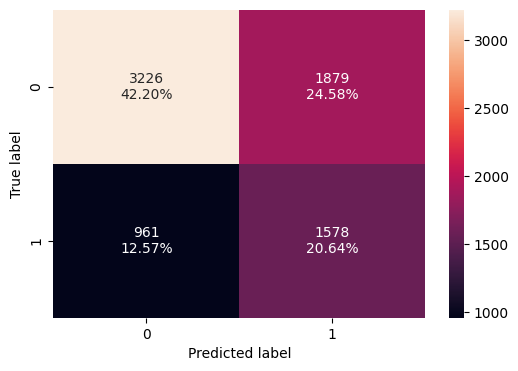

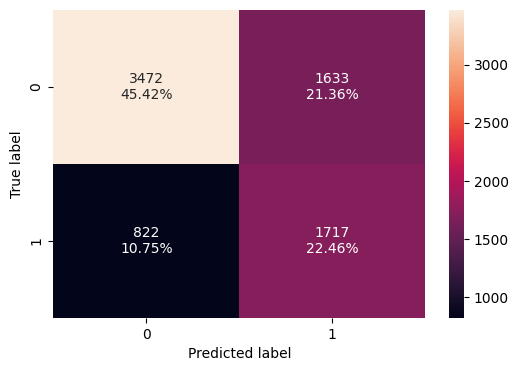

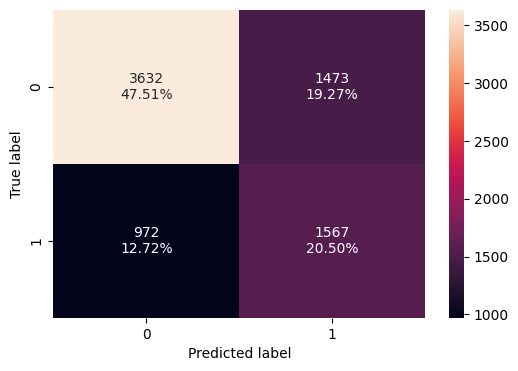

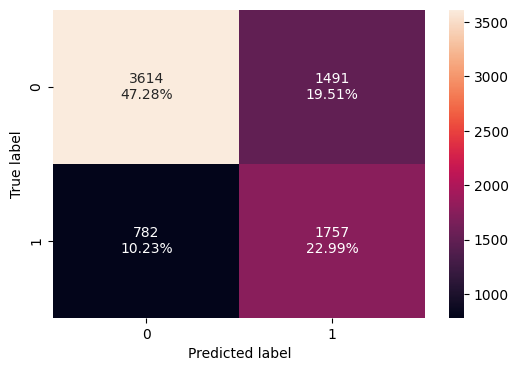

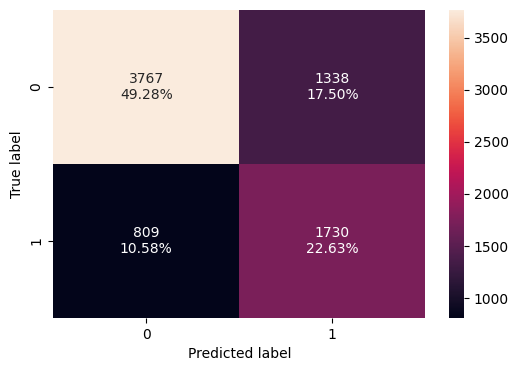

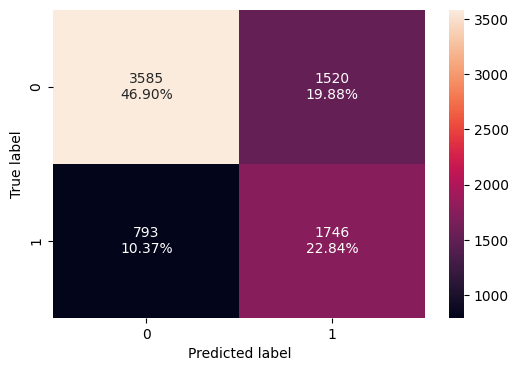

In [168]:
#Model with undersampled data
#Model-1: Decision Tree
X_val = X_test
y_val = y_test
print('------------------------------------------------------------------------')
print('-----------------Model-1: Decision Tree Model---------------------------')
print('------------------------------------------------------------------------')
d_tree2 = DecisionTreeClassifier(random_state=1)
d_tree2.fit(X_train_un,y_train_un)
pred_train2 = d_tree2.predict(X_train_un)
pred_val2 = d_tree2.predict(X_val)
#Calculating different metrics
dtree2_model_train_perf=model_performance_classification_sklearn(d_tree2,X_train_un,y_train_un)
dtree2_model_val_perf=model_performance_classification_sklearn(d_tree2,X_val,y_val)
#Creating confusion matrix
confusion_matrix_sklearn(d_tree2, X_val, y_val)

print('------------------------------------------------------------------------')
print('--------------Model-2: Random Forest Classifer--------------------------')
print('------------------------------------------------------------------------')
#Model-2 RandomForest Classifier
rf_estimator2 = RandomForestClassifier(random_state=1)
rf_estimator2.fit(X_train_un,y_train_un)
pred_RF_classifer_train2 = rf_estimator2.predict(X_train_un)
pred_RF_classifer_val2 = rf_estimator2.predict(X_val)
#Calculating different metrics
rf_estimator2_model_train_perf=model_performance_classification_sklearn(rf_estimator2,X_train_un,y_train_un)
rf_estimator2_model_val_perf=model_performance_classification_sklearn(rf_estimator2,X_val,y_val)
#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator2, X_val, y_val)

print('------------------------------------------------------------------------')
print('------------------Model-3: Bagging Classifer----------------------------')
print('------------------------------------------------------------------------')
#Model-3 Bagging Classifier
bagging_classifier2 = BaggingClassifier(random_state=1)
bagging_classifier2.fit(X_train_un,y_train_un)
#Calculating different metrics
bagging_classifier2_model_train_perf=model_performance_classification_sklearn(bagging_classifier2,X_train_un,y_train_un)
bagging_classifier2_model_val_perf=model_performance_classification_sklearn(bagging_classifier2,X_val,y_val)
#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier2, X_val, y_val)

print('------------------------------------------------------------------------')
print('-----------------Model-4: AdaBoost Classifer----------------------------')
print('------------------------------------------------------------------------')
#Model-4 AdaBoost Classifier
AdaBoost_model2 = AdaBoostClassifier(random_state=1)
AdaBoost_model2.fit(X_train_un,y_train_un)
#Calculating different metrics
AdaBoost2_model_train_perf=model_performance_classification_sklearn(AdaBoost_model2,X_train_un,y_train_un)
AdaBoost2_model_val_perf=model_performance_classification_sklearn(AdaBoost_model2,X_val,y_val)
#Creating confusion matrix
confusion_matrix_sklearn(AdaBoost_model2, X_val, y_val)

print('------------------------------------------------------------------------')
print('--------------Model-5: Gradient Boost Classifer-------------------------')
print('------------------------------------------------------------------------')
#Model-5 Gradient Boost Classifier
GradientBoosting_model2 = GradientBoostingClassifier(random_state=1)
GradientBoosting_model2.fit(X_train_un,y_train_un)
#Calculating different metrics
GradientBoosting_model2_train_perf=model_performance_classification_sklearn(GradientBoosting_model2,X_train_un,y_train_un)
GradientBoosting_model2_val_perf=model_performance_classification_sklearn(GradientBoosting_model2,X_val,y_val)
#Creating confusion matrix
confusion_matrix_sklearn(GradientBoosting_model2, X_val, y_val)

print('------------------------------------------------------------------------')
print('----------------Model-6: XGBoost Classifer------------------------------')
print('------------------------------------------------------------------------')
# Model-6 XBBoost Classifer
XGBoost_model2 = XGBClassifier(random_state=1)
XGBoost_model2.fit(X_train_un,y_train_un)
#Calculating different metrics
XGBoost_model2_train_perf=model_performance_classification_sklearn(XGBoost_model2,X_train_un,y_train_un)
XGBoost_model2_val_perf=model_performance_classification_sklearn(XGBoost_model2,X_val,y_val)
#Creating confusion matrix
confusion_matrix_sklearn(XGBoost_model2, X_val, y_val)

In [169]:
#Metrics Append
df_metrics = add_metric_row(df_metrics, dtree2_model_train_perf, "Decision Tree", "Train", "Undersampled", "dtree2_model_train_perf")
df_metrics = add_metric_row(df_metrics, dtree2_model_val_perf, "Decision Tree", "Validation", "Undersampled", "dtree2_model_val_perf")

#Metrics Append
df_metrics = add_metric_row(df_metrics, rf_estimator2_model_train_perf, "Random Forest", "Train", "Undersampled", "rf_estimator2_model_train_perf")
df_metrics = add_metric_row(df_metrics, rf_estimator2_model_val_perf, "Random Forest", "Validation", "Undersampled", "rf_estimator2_model_val_perf")

#Metrics Append
df_metrics = add_metric_row(df_metrics, bagging_classifier2_model_train_perf, "Bagging Classifier", "Train", "Undersampled", "bagging_classifier2_model_train_perf")
df_metrics = add_metric_row(df_metrics, bagging_classifier2_model_val_perf, "Bagging Classifier", "Validation", "Undersampled", "bagging_classifier2_model_val_perf")

#Metrics Append
df_metrics = add_metric_row(df_metrics, AdaBoost2_model_train_perf, "AdaBoost", "Train", "Undersampled", "AdaBoost2_model_train_perf")
df_metrics = add_metric_row(df_metrics, AdaBoost2_model_val_perf, "AdaBoost", "Validation", "Undersampled", "AdaBoost2_model_val_perf")

#Metrics Append
df_metrics = add_metric_row(df_metrics, GradientBoosting_model2_train_perf, "GradientBoost", "Train", "Undersampled", "GradientBoosting_model2_train_perf")
df_metrics = add_metric_row(df_metrics, GradientBoosting_model2_val_perf, "GradientBoost", "Validation", "Undersampled", "GradientBoosting_model2_val_perf")


#Metrics Append
df_metrics = add_metric_row(df_metrics, XGBoost_model2_train_perf, "XGBoost", "Train", "Undersampled", "XGBoost_model2_train_perf")
df_metrics = add_metric_row(df_metrics, XGBoost_model2_val_perf, "XGBoost", "Validation", "Undersampled", "XGBoost_model2_val_perf")

In [170]:
#Print df_metrics
df_metrics[(df_metrics['Data Type'].str.contains('Undersampled'))]

,Accuracy,Recall,Precision,F1,Test/Train/Val,Model Name,Data Type,Model Variable
28,1.000000,1.000000,1.000000,1.000000,Train,Decision Tree,Undersampled,dtree2_model_train_perf
29,0.628467,0.621505,0.456465,0.526351,Validation,Decision Tree,Undersampled,dtree2_model_val_perf
30,1.000000,1.000000,1.000000,1.000000,Train,Random Forest,Undersampled,rf_estimator2_model_train_perf
31,0.678833,0.676250,0.512537,0.583121,Validation,Random Forest,Undersampled,rf_estimator2_model_val_perf
32,0.977883,0.965558,0.989960,0.977607,Train,Bagging Classifier,Undersampled,bagging_classifier2_model_train_perf
33,0.680141,0.617172,0.515461,0.561749,Validation,Bagging Classifier,Undersampled,bagging_classifier2_model_val_perf
34,0.690613,0.680398,0.694588,0.687420,Train,AdaBoost,Undersampled,AdaBoost2_model_train_perf
35,0.702643,0.692005,0.540948,0.607223,Validation,AdaBoost,Undersampled,AdaBoost2_model_val_perf
36,0.719230,0.687321,0.734175,0.709976,Train,GradientBoost,Undersampled,GradientBoosting_model2_train_perf
37,0.719126,0.681371,0.563885,0.617086,Validation,GradientBoost,Undersampled,GradientBoosting_model2_val_perf


** Metrics Compare **

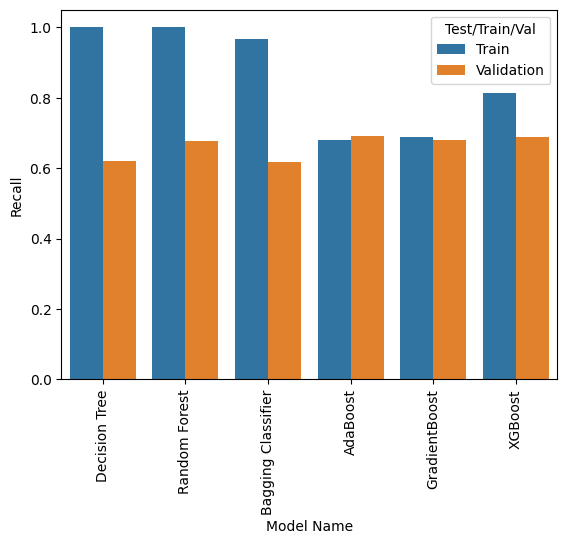

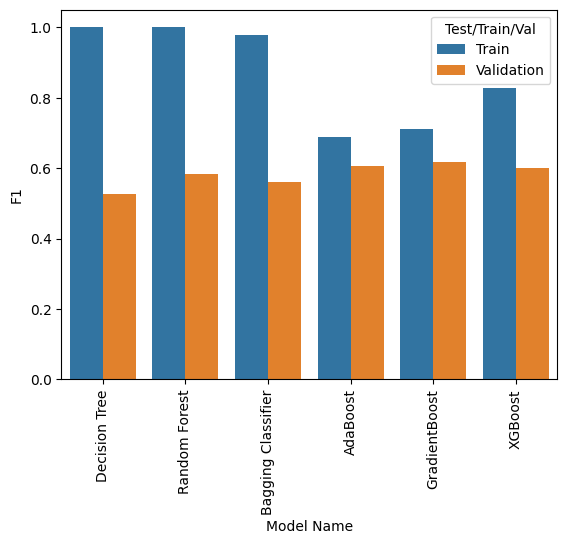

In [171]:
sns.barplot(data=df_metrics[df_metrics['Data Type']=='Undersampled'], x="Model Name", y="Recall", hue="Test/Train/Val") # Changed df_metricsp to df_metrics and df to df_metrics
# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)
plt.show()

sns.barplot(data=df_metrics[df_metrics['Data Type']=='Undersampled'], x="Model Name", y="F1", hue="Test/Train/Val") # Changed df_metricsp to df_metrics and df to df_metrics
# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)
plt.show()

**Observations:**

1. Undersampling has improved the recall score for all models for train and validation data.
2. Similar to original data and oversampled data, the models perform poorly on undersampled data for Decision Tree, Random Forest, Bagging Classifier where 3. 3. Recall and Precision both drops significantly on validation data.
4. Recall score is improved on undersampled train data for AdaBoost (0.66), GradientBoost(0.69) and XGBoost(0.86). These models also generalizes well on Validation data with recall score as AdaBoost(0.68), GradientBoost(0.68) and XGBoost(0.69).
5. F1 score is improved on undersampled train data for Adaboost(0.68), GradientBoost(0.71) and XGBoost(0.87). AdaBoost and GradientBoost generalizes well on validation data with F1 score of 0.61 and 0.62 respectively.
6. It is recommended to see the drop in Recall and F1 from training set to validation set.

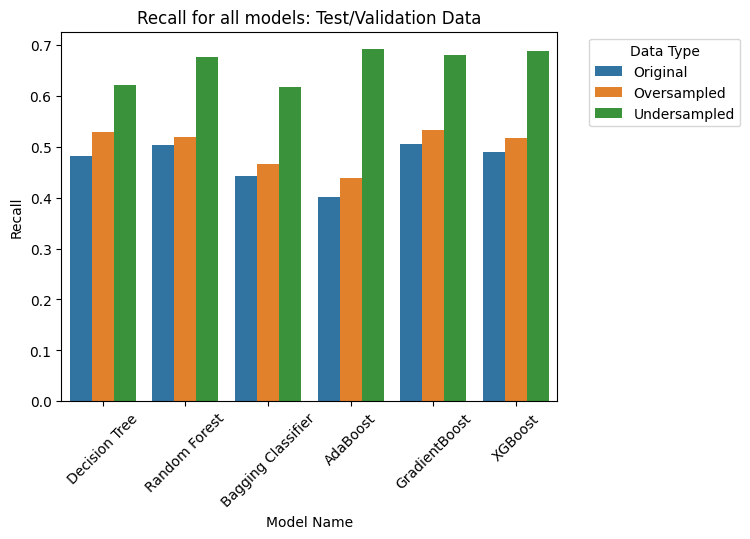

In [173]:
#Draw bar graph for all Recall values with x-axis as Model Name, y-axis as Recall, hue="Data Type"
sns.barplot(data=df_metrics[(df_metrics['Test/Train/Val']=='Test') |
                            (df_metrics['Test/Train/Val']=='Validation')],
                            x="Model Name",
                            y="Recall",
                            hue='Data Type'
)
# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)
plt.legend(title='Data Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Recall for all models: Test/Validation Data')

plt.show()


**Observations**

1. Undersampling has improved the model performance for all the models.


**Find the difference of score (drop in scores) from train data to validation data**

In [174]:
print("\nTraining and Validation Performance Difference for Recall Scores:Undersampled Data\n")

# Initialize train_recall and val_recall for each row
train_recall = 0.00  # Initialize to 0 for Train
val_recall = 0.00  # Initialize to 0 for Validation
#Initialize index and row
index = 0
row = 0

#Read each row in df_metrics and find difference of Recall column  data_type=Train  and data_type=Validation
for index, row in df_metrics.iterrows():

    if row['Test/Train/Val'] == 'Train' and row['Data Type'] == 'Undersampled':
        train_recall = row['Recall']
        #print(train_recall)
    elif row['Test/Train/Val'] == 'Validation' and row['Data Type'] == 'Undersampled':
        val_recall = row['Recall']
        #print(val_recall)
    if ((train_recall > 0.00)  and (val_recall > 0.00)):
        difference1 = train_recall - val_recall
        print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(row['Model Name'], train_recall, val_recall, difference1))
        train_recall = 0.00
        val_recall = 0.00
        difference1 = 0.00

print("\nTraining and Validation Performance Difference for Precision Scores:Undersampled\n")

# Initialize train_Precision and val_Precision for each row
train_Precision = 0.00  # Initialize to 0 for Train
val_Precision = 0.00  # Initialize to 0 for Validation

#Read each row in df_metrics and find difference of Precision column  data_type=Train  and data_type=Validation
for index, row in df_metrics.iterrows():

    if row['Test/Train/Val'] == 'Train' and row['Data Type'] == 'Undersampled':
        train_Precision = row['Precision']
        #print(train_Precision)
    elif row['Test/Train/Val'] == 'Validation' and row['Data Type'] == 'Undersampled':
        val_Precision = row['Precision']
        #print(val_Precision)
    if ((train_Precision > 0.00)  and (val_Precision > 0.00)):
        difference1 = train_Precision - val_Precision
        print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(row['Model Name'], train_Precision, val_Precision, difference1))
        train_Precision = 0.00
        val_Precision = 0.00
        difference1 = 0.00

# Initialize train_F1 and val_F1 for each row
train_F1 = 0.00  # Initialize to 0 for Train
val_F1 = 0.00  # Initialize to 0 for Validation

#Read each row in df_metrics and find difference of F1 column  data_type=Train  and data_type=Validation
for index, row in df_metrics.iterrows():

    if row['Test/Train/Val'] == 'Train' and row['Data Type'] == 'Undersampled':
        train_F1 = row['F1']
        #print(train_F1)
    elif row['Test/Train/Val'] == 'Validation' and row['Data Type'] == 'Undersampled':
        val_F1 = row['F1']
        #print(val_F1)
    if ((train_F1 > 0.00)  and (val_F1 > 0.00)):
        difference1 = train_F1 - val_F1
        print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(row['Model Name'], train_F1, val_F1, difference1))
        train_F1 = 0.00
        val_F1 = 0.00
        difference1 = 0.00


Training and Validation Performance Difference for Recall Scores:Undersampled Data

Decision Tree: Training Score: 1.0000, Validation Score: 0.6215, Difference: 0.3785
Random Forest: Training Score: 1.0000, Validation Score: 0.6763, Difference: 0.3237
Bagging Classifier: Training Score: 0.9656, Validation Score: 0.6172, Difference: 0.3484
AdaBoost: Training Score: 0.6804, Validation Score: 0.6920, Difference: -0.0116
GradientBoost: Training Score: 0.6873, Validation Score: 0.6814, Difference: 0.0059
XGBoost: Training Score: 0.8145, Validation Score: 0.6877, Difference: 0.1268

Training and Validation Performance Difference for Precision Scores:Undersampled

Decision Tree: Training Score: 1.0000, Validation Score: 0.4565, Difference: 0.5435
Random Forest: Training Score: 1.0000, Validation Score: 0.5125, Difference: 0.4875
Bagging Classifier: Training Score: 0.9900, Validation Score: 0.5155, Difference: 0.4745
AdaBoost: Training Score: 0.6946, Validation Score: 0.5409, Difference: 0.15

**Observations:**

1. Difference in Recall score on Training and validation set (Order of models): AdaBoost < GradientB < XGB < RandomF < BaggingC < Decision Tree
2. Difference in Precision score on Training and validation set (Order of models): AdaBoost < GradientB < XGB < RandomF < BaggingC < Decision Tree
3. Difference in F1 score on Training and validation set (Order of models): AdaBoost < GradientB < XGB < RandomF < BaggingC < Decision Tree
4. The order is same as what was observed with original data. The top two models with undersampled data are also Gradient Boost and AdaBoost.

**Metrics Compare (Original data, Oversample data and undersampled data**

We compared six models on original data, oversampled data and undersampled data. After building 15 models, it was observed that both GBM and Adaboost models, trained on an undersampled dataset, exhibited strong performance on both the training and validation datasets

1. As we have noticed earlier, the top two models with oversampled data are also Gradient Boost and AdaBoost (comparing the difference of train and validation recall scores)
2. On Original data, best models (top 3) are Decision Tree (recall:0.507), Gradient Boost (reacall: 0.505) and Random Forest (recall: 0.503), on test set.
3. On oversampled data, best models (top 3) are Decision Tree (recall: 0.512), Gradient Boost(recall: 0.499) and Random Forest (recall: 0.492). Oversampling has actually degraded the performance of the model , on validation set.
4. On undersampled data, best models (top 3) are XGBoost (0.692), GradientBoost(0.683) and Random Forest (0.676). Undersampling has improved the performace of the model significantly.
5. Comparing the F1 scores, the best scores are for AdaBoost and Gradient Boost.
6. Sometimes models might overfit after undersampling and oversampling, so it's better to tune the models to get a generalized performance.
7. We will further perform hypertuning to ensure our data sampling and models are tuned:
    Decision Tree (original data)
    AdaBoost (undersampled data and oversampled both)
    GradientBoost(undersampled data)
    RandomForest (undersampled)

## Hyperparameter Tuning

**Best practices for hyperparameter tuning in AdaBoost:**

`n_estimators`:

- Start with a specific number (50 is used in general) and increase in steps: 50, 75, 85, 100

- Use fewer estimators (e.g., 50 to 100) if using complex base learners (like deeper decision trees)

- Use more estimators (e.g., 100 to 150) when learning rate is low (e.g., 0.1 or lower)

- Avoid very high values unless performance keeps improving on validation

`learning_rate`:

- Common values to try: 1.0, 0.5, 0.1, 0.01

- Use 1.0 for faster training, suitable for fewer estimators

- Use 0.1 or 0.01 when using more estimators to improve generalization

- Avoid very small values (< 0.01) unless you plan to use many estimators (e.g., >500) and have sufficient data


---

**Best practices for hyperparameter tuning in Random Forest:**


`n_estimators`:

* Start with a specific number (50 is used in general) and increase in steps: 50, 75, 100, 125
* Higher values generally improve performance but increase training time
* Use 100-150 for large datasets or when variance is high


`min_samples_leaf`:

* Try values like: 1, 2, 4, 5, 10
* Higher values reduce model complexity and help prevent overfitting
* Use 1–2 for low-bias models, higher (like 5 or 10) for more regularized models
* Works well in noisy datasets to smooth predictions


`max_features`:

* Try values: `"sqrt"` (default for classification), `"log2"`, `None`, or float values (e.g., `0.3`, `0.5`)
* `"sqrt"` balances between diversity and performance for classification tasks
* Lower values (e.g., `0.3`) increase tree diversity, reducing overfitting
* Higher values (closer to `1.0`) may capture more interactions but risk overfitting


`max_samples` (for bootstrap sampling):

* Try float values between `0.5` to `1.0` or fixed integers
* Use `0.6–0.9` to introduce randomness and reduce overfitting
* Smaller values increase diversity between trees, improving generalization

---

**Best practices for hyperparameter tuning in Gradient Boosting:**

`n_estimators`:

* Start with 100 (default) and increase: 100, 200, 300, 500
* Typically, higher values lead to better performance, but they also increase training time
* Use 200–500 for larger datasets or complex problems
* Monitor validation performance to avoid overfitting, as too many estimators can degrade generalization


`learning_rate`:

* Common values to try: 0.1, 0.05, 0.01, 0.005
* Use lower values (e.g., 0.01 or 0.005) if you are using many estimators (e.g., > 200)
* Higher learning rates (e.g., 0.1) can be used with fewer estimators for faster convergence
* Always balance the learning rate with `n_estimators` to prevent overfitting or underfitting


`subsample`:

* Common values: 0.7, 0.8, 0.9, 1.0
* Use a value between `0.7` and `0.9` for improved generalization by introducing randomness
* `1.0` uses the full dataset for each boosting round, potentially leading to overfitting
* Reducing `subsample` can help reduce overfitting, especially in smaller datasets


`max_features`:

* Common values: `"sqrt"`, `"log2"`, or float (e.g., `0.3`, `0.5`)
* `"sqrt"` (default) works well for classification tasks
* Lower values (e.g., `0.3`) help reduce overfitting by limiting the number of features considered at each split

---

**Best practices for hyperparameter tuning in XGBoost:**

`n_estimators`:

* Start with 50 and increase in steps: 50,75,100,125.
* Use more estimators (e.g., 150-250) when using lower learning rates
* Monitor validation performance
* High values improve learning but increase training time

`subsample`:

* Common values: 0.5, 0.7, 0.8, 1.0
* Use `0.7–0.9` to introduce randomness and reduce overfitting
* `1.0` uses the full dataset in each boosting round; may overfit on small datasets
* Values < 0.5 are rarely useful unless dataset is very large

`gamma`:

* Try values: 0 (default), 1, 3, 5, 8
* Controls minimum loss reduction needed for a split
* Higher values make the algorithm more conservative (i.e., fewer splits)
* Use values > 0 to regularize and reduce overfitting, especially on noisy data


`colsample_bytree`:

* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled per tree
* Lower values (e.g., 0.3 or 0.5) increase randomness and improve generalization
* Use `1.0` when you want all features considered for every tree


`colsample_bylevel`:

* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled at each tree level (i.e., per split depth)
* Lower values help in regularization and reducing overfitting
* Often used in combination with `colsample_bytree` for fine control over feature sampling

---

** Tuning Decision Tree using orginal data **

In [175]:
#Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight='balanced',random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30),
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=np.int64(5),
                       max_leaf_nodes=15, min_impurity_decrease=0.001,
                       random_state=1)

In [176]:
print(
    "Best Parameters:{} \nScore: {}".format(grid_obj.best_params_, grid_obj.best_score_)
)

Best Parameters:{'max_depth': np.int64(5), 'max_leaf_nodes': 15, 'min_impurity_decrease': 0.001, 'min_samples_leaf': 1} 
Score: 0.6020361840778821


** Use above parameters for best parameters for decision tree**

In [177]:
# Creating new pipeline with best parameters
dtree_tuned1 = DecisionTreeClassifier(
    random_state=1, criterion="gini", max_depth=6, min_samples_split=2, max_leaf_nodes=15
)

# Fit the model on training data
dtree_tuned1.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=6, max_leaf_nodes=15, random_state=1)

In [178]:
# Calculating different metrics on train set
dtree_grid_train = model_performance_classification_sklearn(
    dtree_tuned1, X_train, y_train
)
print("Training performance:")
dtree_grid_train

df_metrics = add_metric_row(df_metrics, dtree_grid_train, "Decision Tree-Tuned", "Train", "Original", "dtree_tuned1")

#Print df_metrics
df_metrics[(df_metrics['Model Name'].str.contains('Decision Tree-Tuned'))]

Training performance:


,Accuracy,Recall,Precision,F1,Test/Train/Val,Model Name,Data Type,Model Variable
40,0.734638,0.589904,0.602622,0.596195,Train,Decision Tree-Tuned,Original,dtree_tuned1


In [179]:
# Calculating different metrics on validation set
dtree_grid_val = model_performance_classification_sklearn(dtree_tuned1, X_val, y_val)
print("Validation performance:")
dtree_grid_val

#Metrics Append
df_metrics = add_metric_row(df_metrics, dtree_grid_val, "Decision Tree-Tuned", "Validation", "Original", "dtree_tuned1")

#Print df_metrics
df_metrics[(df_metrics['Model Name'].str.contains('Decision Tree-Tuned'))]

Validation performance:


,Accuracy,Recall,Precision,F1,Test/Train/Val,Model Name,Data Type,Model Variable
40,0.734638,0.589904,0.602622,0.596195,Train,Decision Tree-Tuned,Original,dtree_tuned1
41,0.739273,0.602993,0.608506,0.605737,Validation,Decision Tree-Tuned,Original,dtree_tuned1


In [180]:
#Print df_metrics
df_metrics[(df_metrics['Model Name'].str.contains('Decision Tree'))]

,Accuracy,Recall,Precision,F1,Test/Train/Val,Model Name,Data Type,Model Variable
0,1.000000,1.000000,1.000000,1.000000,Train,Decision Tree,Original,dtree_model_train_perf
1,0.664704,0.482473,0.495150,0.488729,Validation,Decision Tree,Original,dtree_model_val_perf
12,1.000000,1.000000,1.000000,1.000000,Train,Decision Tree,Oversampled,dtree1_model_train_perf
13,0.665620,0.528555,0.496853,0.512214,Validation,Decision Tree,Oversampled,dtree1_model_val_perf
14,1.000000,1.000000,1.000000,1.000000,Train,Decision Tree,Oversampled,dtree1_model_train_perf
15,0.665620,0.528555,0.496853,0.512214,Validation,Decision Tree,Oversampled,dtree1_model_val_perf
16,1.000000,1.000000,1.000000,1.000000,Train,Decision Tree,Oversampled,dtree1_model_train_perf
17,0.665620,0.528555,0.496853,0.512214,Validation,Decision Tree,Oversampled,dtree1_model_val_perf
28,1.000000,1.000000,1.000000,1.000000,Train,Decision Tree,Undersampled,dtree2_model_train_perf
29,0.628467,0.621505,0.456465,0.526351,Validation,Decision Tree,Undersampled,dtree2_model_val_perf


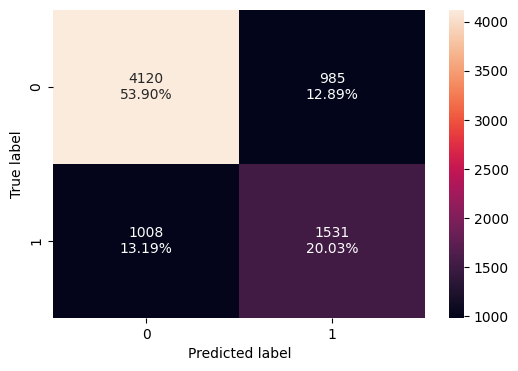

In [181]:
# creating confusion matrix
confusion_matrix_sklearn(dtree_tuned1, X_val, y_val)

**Observations**

1. After hypertuning, the Recall score for validation data has same performance to the Recall in train set.
2. Although model is generalizing well, the tuned decision tree model is underfitting as recall score is ~38%.
3. This model is not the best model even after hypertuning.

**Tuning Adaboost using undersampled data**

In [182]:
AdaBoostClassifier().get_params()

{'algorithm': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [184]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [150,200,250], ## Complete the code to set the number of estimators
    "learning_rate": [0.5], ## Complete the code to set the learning rate.
    "algorithm": ['SAMME'],       # Changed to 'SAMME' to be compatible with scikit-learn 1.5.2
    "estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

from sklearn.model_selection import RandomizedSearchCV

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un) ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 150, 'learning_rate': 0.5, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1), 'algorithm': 'SAMME'} with CV score=0.6969028007748214:
CPU times: user 3.99 s, sys: 184 ms, total: 4.18 s
Wall time: 1min 56s


In [185]:
## Complete the code to set the best parameters.
tuned_ada = AdaBoostClassifier(
    n_estimators=250, learning_rate=0.5, estimator=DecisionTreeClassifier(max_depth=2, random_state=1)
)

tuned_ada.fit(X_train_un, y_train_un)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=1),
                   learning_rate=0.5, n_estimators=250)

In [186]:
# Checking model's performance on training set
ada_train_perf = model_performance_classification_sklearn(tuned_ada, X_train_un, y_train_un)
ada_train_perf


#Metrics Append
df_metrics = add_metric_row(df_metrics, ada_train_perf, "AdaBoost-Tuned", "Train", "Undersampled", "tuned_ada")

In [187]:
## Complete the code to check the model performance for validation data.
ada_val_perf = model_performance_classification_sklearn(tuned_ada, X_val, y_val)
ada_val_perf

#Metrics Append
df_metrics = add_metric_row(df_metrics, ada_val_perf, "AdaBoost-Tuned", "Validation", "Undersampled", "tuned_ada")


In [188]:
#Print df_metrics
df_metrics[(df_metrics['Model Name'].str.contains('AdaBoost-Tuned'))]

,Accuracy,Recall,Precision,F1,Test/Train/Val,Model Name,Data Type,Model Variable
42,0.702094,0.670775,0.715598,0.692462,Train,AdaBoost-Tuned,Undersampled,tuned_ada
43,0.714940,0.675463,0.558632,0.611517,Validation,AdaBoost-Tuned,Undersampled,tuned_ada


In [190]:
#Print df_metrics
df_metrics[(df_metrics['Model Name'].str.contains('AdaBoost'))]

,Accuracy,Recall,Precision,F1,Test/Train/Val,Model Name,Data Type,Model Variable
6,0.735983,0.407901,0.667772,0.506446,Train,AdaBoost,Original,AdaBoost_model_train_perf
7,0.736525,0.401733,0.673267,0.503207,Validation,AdaBoost,Original,AdaBoost_model_val_perf
22,0.741962,0.539972,0.734669,0.622450,Train,AdaBoost,Oversampled,AdaBoost1_model_train_perf
23,0.727368,0.437968,0.628604,0.516249,Validation,AdaBoost,Oversampled,AdaBoost1_model_val_perf
34,0.690613,0.680398,0.694588,0.687420,Train,AdaBoost,Undersampled,AdaBoost2_model_train_perf
35,0.702643,0.692005,0.540948,0.607223,Validation,AdaBoost,Undersampled,AdaBoost2_model_val_perf
42,0.702094,0.670775,0.715598,0.692462,Train,AdaBoost-Tuned,Undersampled,tuned_ada
43,0.714940,0.675463,0.558632,0.611517,Validation,AdaBoost-Tuned,Undersampled,tuned_ada


** Observations **

1. After hypertuning, the performance of AdaBoost model is improved. Model shows high recall score (Train: 0.69 and Validation: 0.7).
2. Model is generalizing well.

** Tuning Gradient boost for undersampled data **

In [193]:
GradientBoostingClassifier().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [195]:
%%time

# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5,10),
    "max_features": [np.arange(0.2,0.7,0.1),'sqrt'],
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1) ## Complete the code to set the cv parameter

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un) ## Complete the code to fit the model on under sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 250, 'min_samples_leaf': np.int64(5), 'max_features': 'sqrt'} with CV score=0.7002765275579529:
CPU times: user 2.56 s, sys: 127 ms, total: 2.68 s
Wall time: 1min 17s


In [196]:
# Complete the code to define the best model
tuned_GB2 = GradientBoostingClassifier(
    max_features='sqrt',
    random_state=1,
    n_estimators=150,
    min_samples_leaf=9,
)

tuned_GB2.fit(X_train_un, y_train_un)

GradientBoostingClassifier(max_features='sqrt', min_samples_leaf=9,
                           n_estimators=150, random_state=1)

In [197]:
# Checking model's performance on training set

GB3_train_perf = model_performance_classification_sklearn(
    tuned_GB2, X_train_un, y_train_un
)
GB3_train_perf

#Metrics Append
df_metrics = add_metric_row(df_metrics, GB3_train_perf, "GradientBoost-Tuned", "Train", "Undersampled", "tuned_GB2")

In [198]:
# Checking model's performance on validation set
GB3_val_perf = model_performance_classification_sklearn(
    tuned_GB2, X_val, y_val
)
GB3_val_perf

#Metrics Append
df_metrics = add_metric_row(df_metrics, GB3_val_perf, "GradientBoost-Tuned", "Validation", "Undersampled", "tuned_GB2")

In [199]:
#Print df_metrics
df_metrics[(df_metrics['Model Name'].str.contains('GradientBoost-Tuned'))]

,Accuracy,Recall,Precision,F1,Test/Train/Val,Model Name,Data Type,Model Variable
44,0.718302,0.691879,0.730481,0.710656,Train,GradientBoost-Tuned,Undersampled,tuned_GB2
45,0.718080,0.689248,0.561617,0.618921,Validation,GradientBoost-Tuned,Undersampled,tuned_GB2


In [200]:
#Print df_metrics
df_metrics[(df_metrics['Model Name'].str.contains('GradientBoost'))]

,Accuracy,Recall,Precision,F1,Test/Train/Val,Model Name,Data Type,Model Variable
8,0.754822,0.512240,0.671536,0.581170,Train,GradientBoost,Original,GradientBoosting_model_train_perf
9,0.751047,0.505711,0.664596,0.574368,Validation,GradientBoost,Original,GradientBoosting_model_val_perf
24,0.765110,0.626501,0.737682,0.677561,Train,GradientBoost,Oversampled,GradientBoosting_model1_train_perf
25,0.743982,0.533675,0.636748,0.580673,Validation,GradientBoost,Oversampled,GradientBoosting_model1_val_perf
36,0.719230,0.687321,0.734175,0.709976,Train,GradientBoost,Undersampled,GradientBoosting_model2_train_perf
37,0.719126,0.681371,0.563885,0.617086,Validation,GradientBoost,Undersampled,GradientBoosting_model2_val_perf
44,0.718302,0.691879,0.730481,0.710656,Train,GradientBoost-Tuned,Undersampled,tuned_GB2
45,0.718080,0.689248,0.561617,0.618921,Validation,GradientBoost-Tuned,Undersampled,tuned_GB2


**Observations**

1. Post tuning the Gradient Boost model, the Recall score is similar to pre-tuned model (0.685 pre-tuned and 0.687 post-tuned on train data). For validaiton data, model performance is same asl well (0.683 pre-tuned and 0.687 post-tuned on validation data).
2. Model is generalizing well, but AdaBoost seems to have higher recall and precision (0.701 on valdiation data)
3. Lets reconfirm AdaBoost using oversampled data as well.

** Tuning AdaBoost using Oversampled data **

In [201]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV, but
param_grid = {
    "n_estimators": [150,200,250], ## Complete the code to set the number of estimators
    "learning_rate": [0.5], ## Complete the code to set the learning rate.
    "algorithm": ['SAMME'],       # Changed to 'SAMME' to be compatible with scikit-learn 1.5.2
    "estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over) ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 200, 'learning_rate': 0.5, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1), 'algorithm': 'SAMME'} with CV score=0.64002402125116:
CPU times: user 9.07 s, sys: 258 ms, total: 9.32 s
Wall time: 2min 59s


In [202]:
## Complete the code to set the best parameters.
tuned_ada1 = AdaBoostClassifier(
    n_estimators=250, learning_rate=0.5, estimator=DecisionTreeClassifier(max_depth=2, random_state=1)
)

tuned_ada1.fit(X_train_over, y_train_over)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=1),
                   learning_rate=0.5, n_estimators=250)

** Comparing the performance Metrics **

In [204]:
# Checking model's performance on training set
ada_train_perf = model_performance_classification_sklearn(tuned_ada1, X_train_un, y_train_un)
ada_train_perf


#Metrics Append
df_metrics = add_metric_row(df_metrics, ada_train_perf, "AdaBoost-Tuned", "Train", "Oversampled", "tuned_ada1")

In [205]:
## Complete the code to check the model performance for validation data.
ada_val_perf = model_performance_classification_sklearn(tuned_ada, X_val, y_val)
ada_val_perf

#Metrics Append
df_metrics = add_metric_row(df_metrics, ada_val_perf, "AdaBoost-Tuned", "Validation", "Oversampled", "tuned_ada1")

In [206]:
#Print df_metrics
df_metrics[(df_metrics['Model Name'].str.contains('AdaBoost'))]

,Accuracy,Recall,Precision,F1,Test/Train/Val,Model Name,Data Type,Model Variable
6,0.735983,0.407901,0.667772,0.506446,Train,AdaBoost,Original,AdaBoost_model_train_perf
7,0.736525,0.401733,0.673267,0.503207,Validation,AdaBoost,Original,AdaBoost_model_val_perf
22,0.741962,0.539972,0.734669,0.622450,Train,AdaBoost,Oversampled,AdaBoost1_model_train_perf
23,0.727368,0.437968,0.628604,0.516249,Validation,AdaBoost,Oversampled,AdaBoost1_model_val_perf
34,0.690613,0.680398,0.694588,0.687420,Train,AdaBoost,Undersampled,AdaBoost2_model_train_perf
35,0.702643,0.692005,0.540948,0.607223,Validation,AdaBoost,Undersampled,AdaBoost2_model_val_perf
42,0.702094,0.670775,0.715598,0.692462,Train,AdaBoost-Tuned,Undersampled,tuned_ada
43,0.714940,0.675463,0.558632,0.611517,Validation,AdaBoost-Tuned,Undersampled,tuned_ada
46,0.685632,0.529461,0.769948,0.627451,Train,AdaBoost-Tuned,Oversampled,tuned_ada1
47,0.714940,0.675463,0.558632,0.611517,Validation,AdaBoost-Tuned,Oversampled,tuned_ada1


** Observations **

1. AdaBoost when tuned on oversampled data, degrades the model performance with Recall score dropped to 0.493 for train dataset. The recall is higher for validation dataset (0.701), but model is underfitting.
2. So far tuned AdaBoost model on undersampled data is the best model.
3. Lets also check how Random Forest will perform after runing on undersampled data for final check

In [207]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [208]:
%%time

# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [150,200,250], ## Complete the code to set the number of estimators.
    "min_samples_leaf": np.arange(5,10),## Complete the code to set the minimum number of samples in the leaf node.
    "max_features": [np.arange(0.2,0.7,0.1),'sqrt'], ## Complete the code to set the maximum number of features.
    "max_samples": np.arange(0.3,0.7,0.1)} ## Complete the code to set the maximum number of samples.


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1) ## Complete the code to set the cv parameter

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un) ## Complete the code to fit the model on under sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 150, 'min_samples_leaf': np.int64(7), 'max_samples': np.float64(0.6000000000000001), 'max_features': 'sqrt'} with CV score=0.6950274187582451:
CPU times: user 3.8 s, sys: 392 ms, total: 4.19 s
Wall time: 2min 48s


In [209]:
# Complete the code to define the best model
tuned_rf2 = RandomForestClassifier(
    max_features='sqrt',
    random_state=1,
    max_samples=0.6,
    n_estimators=200,
    min_samples_leaf=5,
)

tuned_rf2.fit(X_train_un, y_train_un)

RandomForestClassifier(max_samples=0.6, min_samples_leaf=5, n_estimators=200,
                       random_state=1)

** Compare the performance score of the model **

In [210]:
rf2_train_perf = model_performance_classification_sklearn(
    tuned_rf2, X_train_un, y_train_un
)
rf2_train_perf

#Metrics Append
df_metrics = add_metric_row(df_metrics, rf2_train_perf, "RandomForest-Tuned", "Train", "Undersampled", "rf2_train_perf")

In [211]:
## Complete the code to print the model performance on the validation data.
rf2_val_perf = model_performance_classification_sklearn(tuned_rf2,X_val,y_val)
rf2_val_perf

#Metrics Append
df_metrics = add_metric_row(df_metrics, rf2_val_perf, "RandomForest-Tuned", "Validation", "Undersampled", "rf2_val_perf")

In [212]:
#Print df_metrics
df_metrics[(df_metrics['Model Name'].str.contains('RandomForest'))]

,Accuracy,Recall,Precision,F1,Test/Train/Val,Model Name,Data Type,Model Variable
48,0.761101,0.731217,0.777698,0.753742,Train,RandomForest-Tuned,Undersampled,rf2_train_perf
49,0.722004,0.683340,0.567736,0.620197,Validation,RandomForest-Tuned,Undersampled,rf2_val_perf


** Observations **

1. Tuning RandomForest model has upgraded the Recall score of train data (0.765), however the performance degraded on validation set (0.675). This is lower than previously selected model - AdaBoost on undersampled data.
2. We will drop this model and stick to AdaBoost as our goto model.

## Model Performance Summary and Final Model Selection

In [213]:
#Training Set performance on Tuned Model
#Print df_metrics for 'Model Values' containing string Tuned
df_metrics[(df_metrics['Model Name'].str.contains('Tuned')) & (df_metrics['Test/Train/Val'].str.contains('Train'))]


,Accuracy,Recall,Precision,F1,Test/Train/Val,Model Name,Data Type,Model Variable
40,0.734638,0.589904,0.602622,0.596195,Train,Decision Tree-Tuned,Original,dtree_tuned1
42,0.702094,0.670775,0.715598,0.692462,Train,AdaBoost-Tuned,Undersampled,tuned_ada
44,0.718302,0.691879,0.730481,0.710656,Train,GradientBoost-Tuned,Undersampled,tuned_GB2
46,0.685632,0.529461,0.769948,0.627451,Train,AdaBoost-Tuned,Oversampled,tuned_ada1
48,0.761101,0.731217,0.777698,0.753742,Train,RandomForest-Tuned,Undersampled,rf2_train_perf


In [214]:
#Validation Set performance on Tuned Model
#Print df_metrics for 'Model Values' containing string Tuned
df_metrics[(df_metrics['Model Name'].str.contains('Tuned')) & (df_metrics['Test/Train/Val'].str.contains('Validation'))]

,Accuracy,Recall,Precision,F1,Test/Train/Val,Model Name,Data Type,Model Variable
41,0.739273,0.602993,0.608506,0.605737,Validation,Decision Tree-Tuned,Original,dtree_tuned1
43,0.714940,0.675463,0.558632,0.611517,Validation,AdaBoost-Tuned,Undersampled,tuned_ada
45,0.718080,0.689248,0.561617,0.618921,Validation,GradientBoost-Tuned,Undersampled,tuned_GB2
47,0.714940,0.675463,0.558632,0.611517,Validation,AdaBoost-Tuned,Oversampled,tuned_ada1
49,0.722004,0.683340,0.567736,0.620197,Validation,RandomForest-Tuned,Undersampled,rf2_val_perf


** Observations **

1. We tuned multiple models (Decision tree, AdaBoost, Gradient Boost and Random Forest)
2. Based on Recall value,AdaBoost model tuned on undersampled data gives the best Recall value on validation data.
3. Second best model continues to be GradientBoost with Recall score of 0.687 on validation set.
4. We should evaluate both Adaboost and Gradient boost on unseen data (test data).

** Final Performance score on top two selected **

** Adaboost Tuned score **

In [215]:
## Complete the code to print the model performance on the test data by the best model.
test = model_performance_classification_sklearn(tuned_ada, X_test, y_test)
test

,Accuracy,Recall,Precision,F1
0,0.71494,0.675463,0.558632,0.611517


** Gradient boost Tuned **

In [216]:
## Complete the code to print the model performance on the test data by the best model.
test = model_performance_classification_sklearn(tuned_GB2, X_test, y_test)
test

,Accuracy,Recall,Precision,F1
0,0.71808,0.689248,0.561617,0.618921


Observations:

1. Both ADABoost and GradientBoost are showing similar performance. Gradientboost is slightly better on test data (Recall 0.67 for AdaBoost vs 0.68 for Gradient Boost).
2. Additionally F1 is an important score evaluation of the model, greater the F1 score higher are the chances of minimizing False Negatives and False Positives.That would mean we will have lesser inelgible candidates marked as eligible and vise versa. F1 score is 0.6 for both models. Selecting Gradientboost gives better Recall and F1.

** Feature importance **

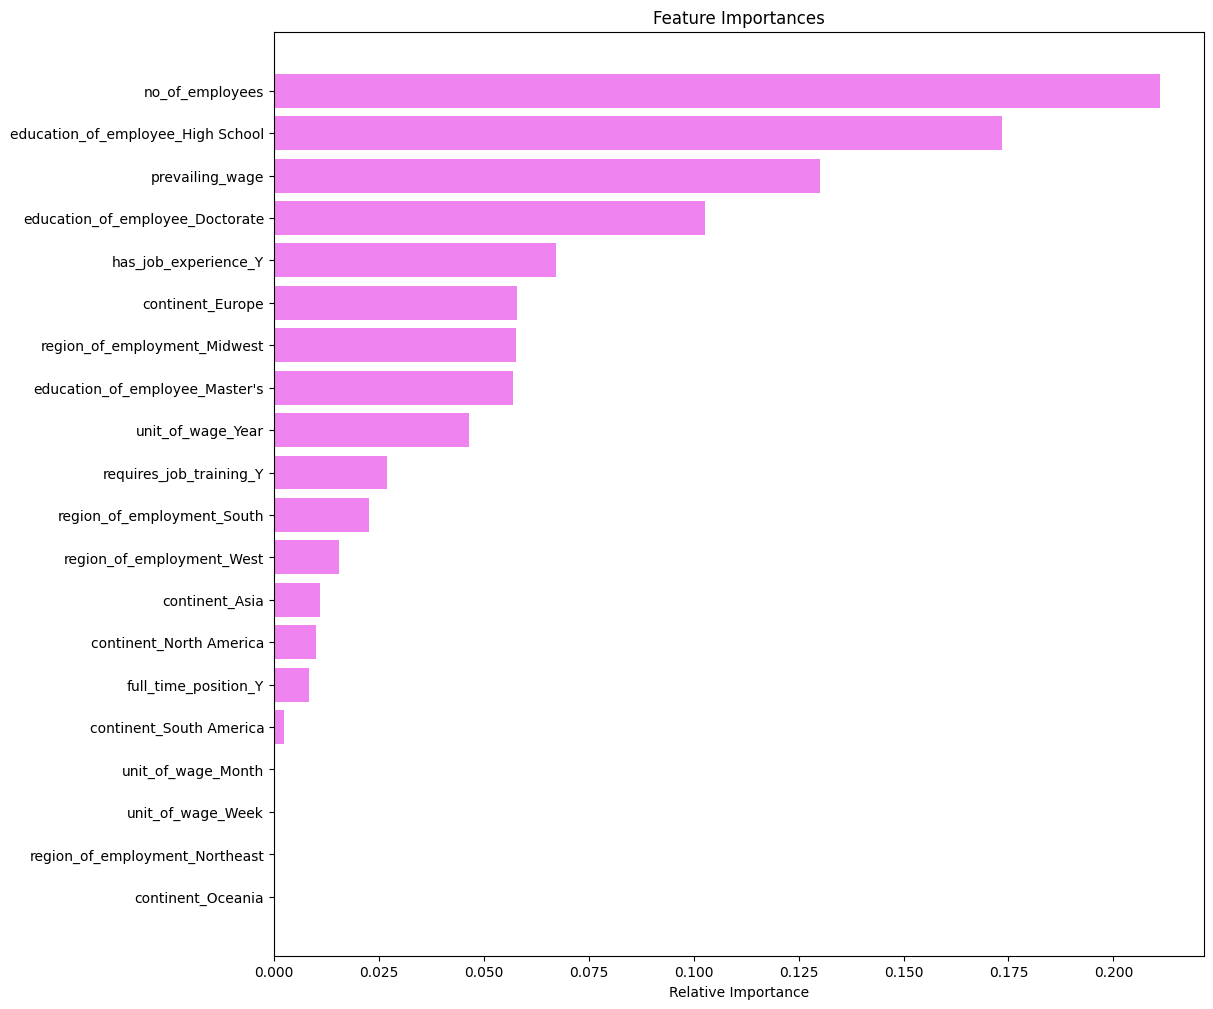

In [217]:
feature_names = X_train.columns
importances = tuned_ada.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Actionable Insights and Recommendations

<font size=6 color='blue'>Power Ahead</font>
___

** Key Data Insights (Univariate and Bivariate Analysis) **

1. The dataset has 25480 rows and 12 columns, with no dulicates and no missing values.
2. The dataset has 3 numerical fields and 9 object type fields, which were converted to numeric type by using encoding dummies.
3. There are some negative values in 'no_of_employees' field, that were corrected using absolute values (data cleansing)
4. It seems some companies have fairly large employee count, with maximum employees as 602069 for a company.
5. Mean wage is 74455.81, but as minimum is 2.137, which mean unit_of_wage (hourly, weekly, monthly, yearly) is an important parameter for modeling.
'Continent' has 6 unique values, with highest volume from Asia (16861) and lowest from Oceania (192)
6. Maximum number of applicants have highest education as bachelors (10234). 10678 applicants have no job experience but only 2955 requires job training. ~40% of the applicants are having bachelor's degree and ~38% of them have Master's degree. ~46% of the applications are having higher education (Masters or Doctorate)
~58% of the applicants have job application. ~33% of the applicants are denied.
There is no major correlation between no_of_employees, yr_of_estab and prevailing_wage of the applicants.
7. Applicants with higher education have higher approval chance. They may be travelling abroad for a well-paid job.
8. Asia has maximum number of applicants and thus also has highest number of approvals. ~65% (11012 applicants) of total approvals (17018) are from Asia region.Europe region has maximum approval rate. ~80% of the European applicants are getting approved, while this certified rate is ~65% for Asian applicants.
Experienced professionals may look abroad for opportunities to have better career opportunities. The data says that we have higher visa certification for applicants with job experience (74%) versus applicants without job experience (54%).
6. Prevailing wages is higher for Island (mostly hourly wages). Monthly salary is higher in Midwest compared to other regions
7. Visa approval rate is slightly higher for applicants with higher salary.
8. Important to note that 90% of the applicants have yearly salary, but there are some applicants who reported hourly, weekly and monthly.The yearly prevailing wage has nearly 70% approval rate (against hourly salary that has ~35% approval)
9. Applicants from Midwest have highest chance of approval, whereas applicants from Island have lowest chance of approval

** Model Building **

  ** Evaluation Criteria:**

    1. Predicting an applicant is eligible for visa, but actually not eligible (False positive-FP). This will result in a qualified applicant to miss job opportunity.
    2. Predicting an applicant is not eligible for visa(denied), but actually is eligible (False Negative-FN). This will also result in a qualified job applicant to miss job opportunity.
  **Which metrics to optimize?**
  1. We would want Recall and F1 to be maximized, the greater Recall, higher the changes of minimizing false negatives.
  2. Recall is likely the most important metric in predicting visa eligibility, as failing to identify an eligible applicant would mean losing on potential candidate.
  3. In addition F1 score is also an important parameter to reduce FP and FNs.
  4. This will ensure that a potential applicant who might otherwise contribute positively to the country is not being unfairly rejected.
  5. Missing eligible applicants could mean missing out on valuable candidates, such as skilled professionals or students.
  6. On the other hand, if there are ineligible candidate, who are marked as eligible, there are other subsequent screening steps that can filter them out.

Hence, We would want to focus on Recall and F1 score.

** Model Building Approach **

    ** Undersampled data:**
    1.  We compared six models on original data, oversampled data and undersampled data. After building 18 models (6 X 3), it was observed that both GBM and Adaboost models, trained on an undersampled dataset, exhibited strong performance on both the training and validation datasets
    ** Drop in scores:**
    1. When seeing the drop of scores (F1 and Recall) from train set to validation set, the top two models are AdaBoost and Gradient Boost.
    ** Hypertuning: **
    1. Sometimes models might overfit after undersampling and oversampling, so it's better to tune the models to get a generalized performance. We performed hypertuning on 5 models
      * Decision Tree (original data)
      * AdaBoost (undersampled data and oversampled both)
      * GradientBoost(undersampled data)
      * RandomForest (undersampled)
    2. As we have noticed earlier, the top two models with oversampled data are also Gradient Boost and AdaBoost (comparing the difference of train and validation recall scores)
    ** Test Data:**
    1. Tuned models were applied to unseen test data. Both ADABoost and GradientBoost are showing similar performance.

    **Final Model selected **
    **Gradientboost as it had better f1 and recall score**

** Business Insights**
1. The top three features that are important for the decision making are education_of_employee,no_of_employees and unit_of_wage.
2. The applicant with following elements have highest chance of approval:
Education Level : Higher the education, better chance of approval. Candidate should have atleast Bachelor's degree, but masters and doctorate are preferred.
3. Number of employees: Applicant should be from one of the companies having higher number of employees
4. Median prevailing wage of the employee for whom visa approval are higher, is around ~75K.
5. Job Experience: Candidate should have some job experience.
6. Continent: Applicants from Europe, Africa, and Asia have higher chances of visa certification. Highest number of applicants that are certified for visa are from Asia, Europe and North America (94%).
7. Additional considerations
    * Region of Employment: Applications with region of employment Midwest and South have higher chances of approval (~70%).
    * Unit of Wage: Applicants that are getting yearly salary are more likely to get visa approved.
    * Check on Employer's status as well (not only applicant) like salary being paid, region of employment, unit of salary, number of employees

** Business Recommendation **
1. It is recommended to have a "pre-screening" process or an automated tool that can use these top predictive features to score candidates on visa eligibility before moving forward. This helps prioritize high-potential applicants.
2. Employer Vetting Process: Ensure that the employer is in a favorable position for visa approval by validating parameters like number of employees, unit of wage, salary etc.
3. Business can focus on talent sourcing, partnerships, and marketing efforts on countries/regions with historically higher approval rates (Asia, Europe, North America) and large or reputable employers in the Midwest and South regions.
4. Business should continuouly evolve the model year on year with additional data as market condition and availability of candidates may change over time.